In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [ ]:
import kagglehub
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.


In [ ]:
# reading the csv file
data = pd.read_csv(path + '/diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
# copying the original data
df = data.copy()

In [ ]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
#Target columns distribution
df['Diabetes_binary'].value_counts(normalize=True)

,proportion
Diabetes_binary,
0.0,0.860667
1.0,0.139333


Looks like the dataset is pretty imbalanced, only about 14% of the entries are positive cases. We'll handle that later using an undersampling approach.

In [ ]:
#How many duplicates are there in the entire dataset
n_dups = df.duplicated().sum()
dup_rate = n_dups / len(df)
print(f"Duplicates: {n_dups} rows ({dup_rate:.2%})")

Duplicates: 24206 rows (9.54%)


In [ ]:
#Distribution of duplicates by target
dup_by_y = df[df.duplicated()]['Diabetes_binary'].value_counts(dropna=False)
print("Duplicates by target:\n", dup_by_y)

Duplicates by target:
 Diabetes_binary
0.0    23957
1.0      249
Name: count, dtype: int64


We decided to keep the duplicates in the dataset, since they do not represent a technical error but rather different individuals with identical characteristics. In medical data, it is common for several patients to share the same features, and removing them could distort the population distribution and reduce the model’s ability to reflect reality. Therefore, keeping the duplicates was intended to preserve the integrity of the original data.

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


<Axes: >

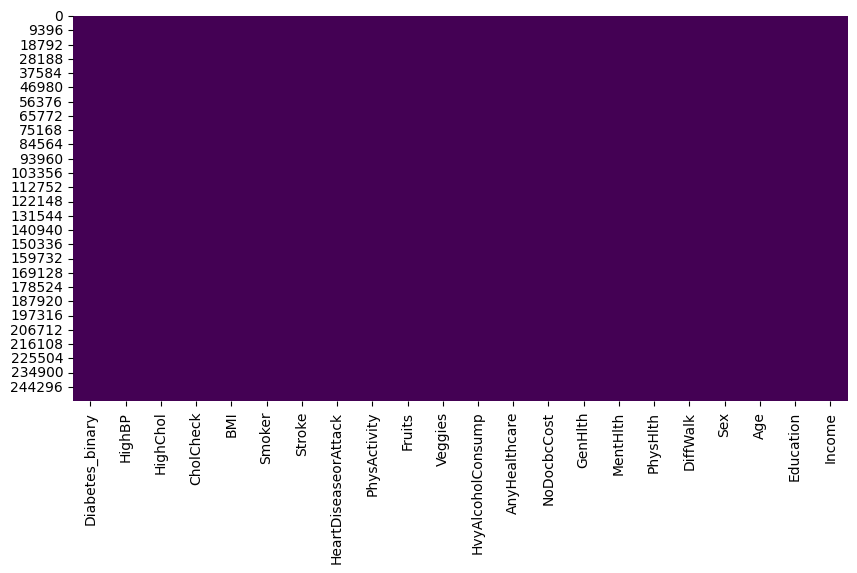

In [ ]:
#analyze missing data
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
#converting age to categorical
age_labels = [
    '18–24', '25–29', '30–34', '35–39', '40–44', '45–49',
    '50–54', '55–59', '60–64', '65–69', '70–74', '75–79', '80+'
]

# Create a new categorical column
df['Age_cat'] = pd.Categorical(
    [age_labels[int(i) - 1] for i in df['Age']],
    categories=age_labels,
    ordered=True
)

In [ ]:
edu_labels = [
    'Never attended / Kindergarten',
    'Elementary (Grades 1–8)',
    'Some high school (9–11)',
    'High-school graduate',
    'Some college / technical (1–3 yrs)',
    'College graduate (4+ yrs)'
]

df['Education_cat'] = pd.Categorical(
    [
        edu_labels[int(code) - 1] if pd.notna(code) else np.nan
        for code in df['Education']
    ],
    categories=edu_labels,
    ordered=True
)

In [ ]:
income_labels = [
    'Less than $10,000',
    '$10,000–$14,999',
    '$15,000–$19,999',
    '$20,000–$24,999',
    '$25,000–$34,999',
    '$35,000–$49,999',
    '$50,000–$74,999',
    '$75,000 or more'
]

df['Income_cat'] = pd.Categorical(
    [
        income_labels[int(code) - 1] if pd.notna(code) else np.nan  # translate code → label
        for code in df['Income']
    ],
    categories=income_labels,
    ordered=True
)

We converted age, education, and income from codes into categorical labels to make the data more interpretable and meaningful for analysis and visualization.

##Data Understanding - EDA

---



### single attribute vs diabetes

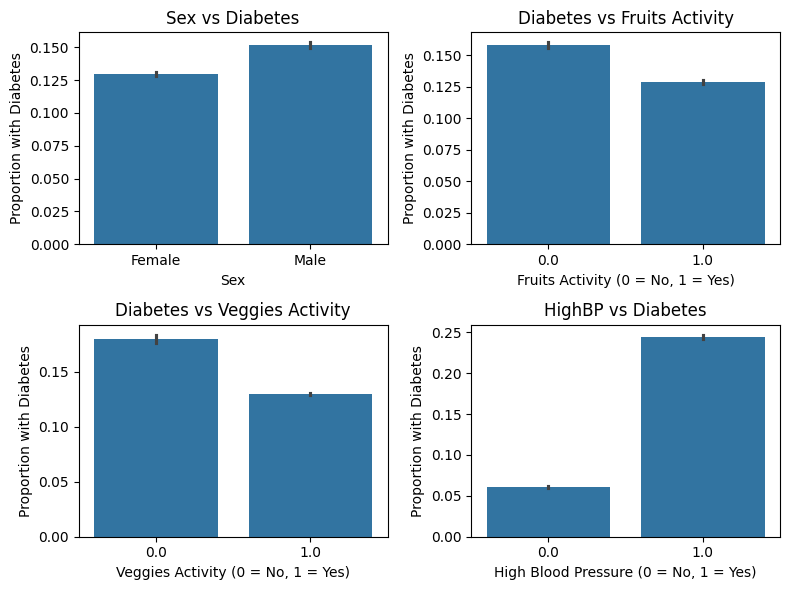

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

#Plot 1: Sex vs Diabetes
ax = sns.barplot(x='Sex', y='Diabetes_binary', data=df, ax=axes[0,0])
ax.set_title("Sex vs Diabetes")
ax.set_xlabel("Sex")
ax.set_ylabel("Proportion with Diabetes")
ax.set_xticks([0,1])
ax.set_xticklabels(['Female', 'Male'])

#Plot 2: Fruits vs Diabetes
ax = sns.barplot(x='Fruits', y='Diabetes_binary', data=df, ax=axes[0,1])
ax.set_title("Diabetes vs Fruits Activity")
ax.set_xlabel("Fruits Activity (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

#Plot 3: Veggies vs Diabetes
ax = sns.barplot(x='Veggies', y='Diabetes_binary', data=df, ax=axes[1,0])
ax.set_title("Diabetes vs Veggies Activity")
ax.set_xlabel("Veggies Activity (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

#Plot 4: HighBP vs Diabetes
ax = sns.barplot(x='HighBP', y='Diabetes_binary', data=df, ax=axes[1,1])
ax.set_title("HighBP vs Diabetes")
ax.set_xlabel("High Blood Pressure (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

plt.tight_layout()
plt.show()


Men show a slightly higher incidence of diabetes than women, but diet has a greater influence - regular consumption of fruits and vegetables lowers the risk. However, in this section the strongest predictive factor is high blood pressure - which greatly increases the likelihood of diabetes.

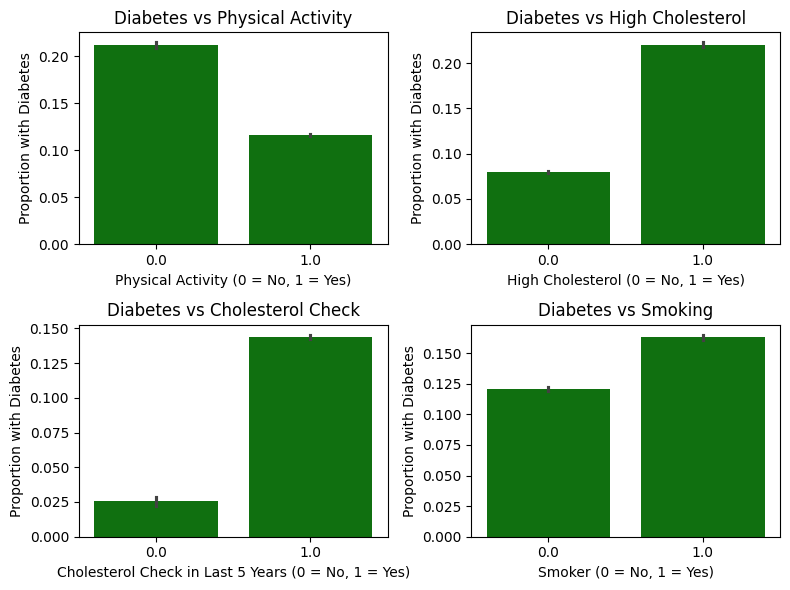

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

#Plot 1: Physical Activity vs Diabetes
ax = sns.barplot(x='PhysActivity', y='Diabetes_binary', data=df, ax=axes[0,0], color="green")
ax.set_title("Diabetes vs Physical Activity")
ax.set_xlabel("Physical Activity (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

#Plot 2: High Cholesterol vs Diabetes
ax = sns.barplot(x='HighChol', y='Diabetes_binary', data=df, ax=axes[0,1], color="green")
ax.set_title("Diabetes vs High Cholesterol")
ax.set_xlabel("High Cholesterol (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

#Plot 3: Cholesterol Check vs Diabetes
ax = sns.barplot(x='CholCheck', y='Diabetes_binary', data=df, ax=axes[1,0], color="green")
ax.set_title("Diabetes vs Cholesterol Check")
ax.set_xlabel("Cholesterol Check in Last 5 Years (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

#Plot 4: Smoking vs Diabetes
ax = sns.barplot(x='Smoker', y='Diabetes_binary', data=df, ax=axes[1,1], color="green")
ax.set_title("Diabetes vs Smoking")
ax.set_xlabel("Smoker (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

plt.tight_layout()
plt.show()


Individuals who exercise regularly show a much lower prevalence of diabetes, making activity a strong predective factor. High cholesterol is strongly linked to diabetes risk. Those who had a cholesterol check in the past five years also show higher rates - likely because at-risk individuals seek testing. Smoking shows only a slight increase in diabetes prevalence - making it a weaker predictor.

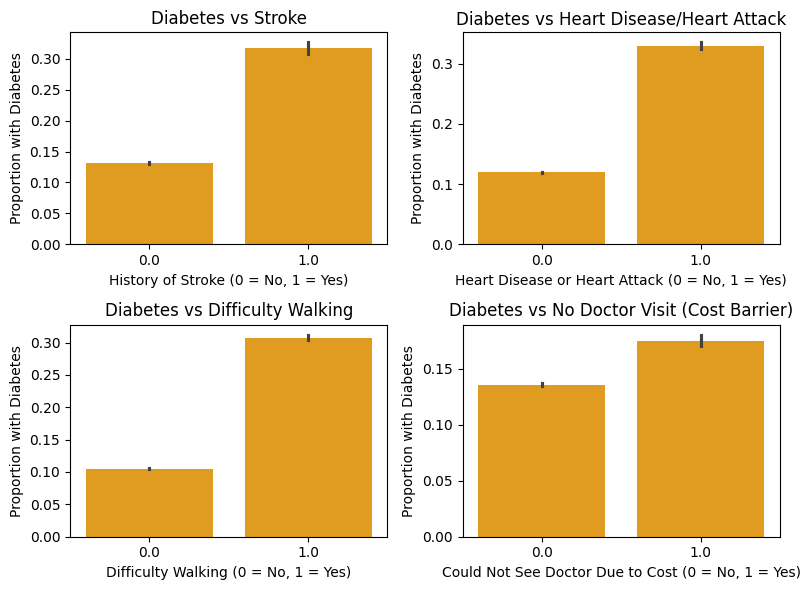

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

#Plot 1: Stroke vs Diabetes
ax = sns.barplot(x='Stroke', y='Diabetes_binary', data=df, ax=axes[0,0], color="orange")
ax.set_title("Diabetes vs Stroke")
ax.set_xlabel("History of Stroke (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

#Plot 2: Heart Disease or Heart Attack vs Diabetes
ax = sns.barplot(x='HeartDiseaseorAttack', y='Diabetes_binary', data=df, ax=axes[0,1], color="orange")
ax.set_title("Diabetes vs Heart Disease/Heart Attack")
ax.set_xlabel("Heart Disease or Heart Attack (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

#Plot 3: Difficulty Walking vs Diabetes
ax = sns.barplot(x='DiffWalk', y='Diabetes_binary', data=df, ax=axes[1,0], color="orange")
ax.set_title("Diabetes vs Difficulty Walking")
ax.set_xlabel("Difficulty Walking (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

#Plot 4: No Doctor Due to Cost vs Diabetes
ax = sns.barplot(x='NoDocbcCost', y='Diabetes_binary', data=df, ax=axes[1,1], color="orange")
ax.set_title("Diabetes vs No Doctor Visit (Cost Barrier)")
ax.set_xlabel("Could Not See Doctor Due to Cost (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

plt.tight_layout()
plt.show()


Individuals with a history of stroke or heart disease have a much higher prevalence of diabetes which demonstrate the connection beteween them to diabetes. Difficulty walking is also strongly associated with diabetes. By contrast, not seeing a doctor due to cost shows only a modest increase - making it a weaker predictor.

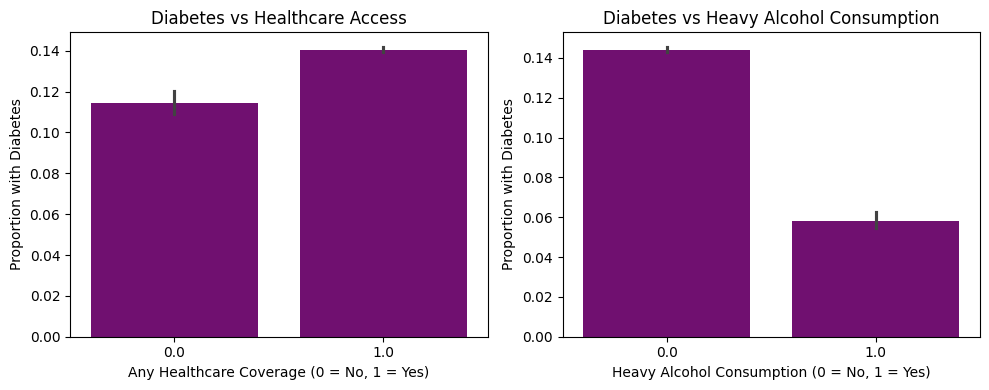

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#Plot 1: Any Healthcare vs Diabetes
ax = sns.barplot(x='AnyHealthcare', y='Diabetes_binary', data=df, ax=axes[0], color="purple")
ax.set_title("Diabetes vs Healthcare Access")
ax.set_xlabel("Any Healthcare Coverage (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

#Plot 2: Heavy Alcohol Consumption vs Diabetes
ax = sns.barplot(x='HvyAlcoholConsump', y='Diabetes_binary', data=df, ax=axes[1], color="purple")
ax.set_title("Diabetes vs Heavy Alcohol Consumption")
ax.set_xlabel("Heavy Alcohol Consumption (0 = No, 1 = Yes)")
ax.set_ylabel("Proportion with Diabetes")

plt.tight_layout()
plt.show()


Individuals with healthcare coverage show a slightly higher diabetes prevalence - likely because diagnosed patients use healthcare more. In contrast, heavy alcohol consumers report much lower prevalence.

###Demographic analysis

/tmp/ipython-input-1416980524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


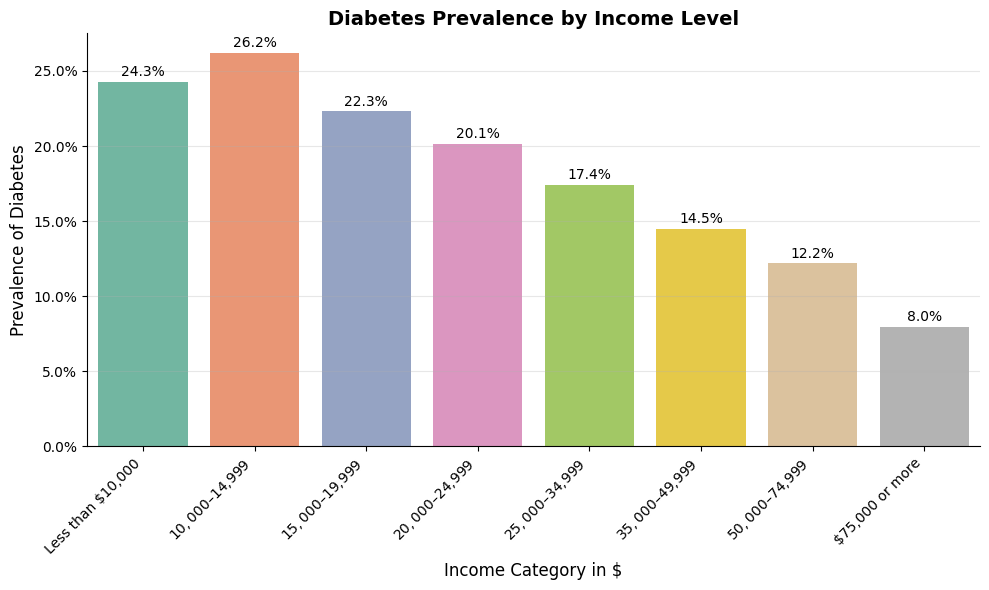

In [ ]:
# Use a categorical palette with distinct colors
colors = sns.color_palette("Set2", n_colors=df['Income_cat'].nunique())

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Income_cat',
    y='Diabetes_binary',
    data=df,
    palette=colors,
    errorbar=None
)

ax.set_title("Diabetes Prevalence by Income Level", fontsize=14, fontweight="bold")
ax.set_xlabel("Income Category in $", fontsize=12)
ax.set_ylabel("Prevalence of Diabetes", fontsize=12)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.xticks(rotation=45, ha="right")

# Add data labels
for c in ax.containers:
    labels = [f"{v.get_height()*100:.1f}%" for v in c]
    ax.bar_label(c, labels=labels, padding=2)

sns.despine()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


The graph shows that lower income is linked to higher diabetes prevalence - around 25–27% in the lowest brackets, while rates drop below 10% in the highest. This underscores the impact of socioeconomic factors on diabetes risk.

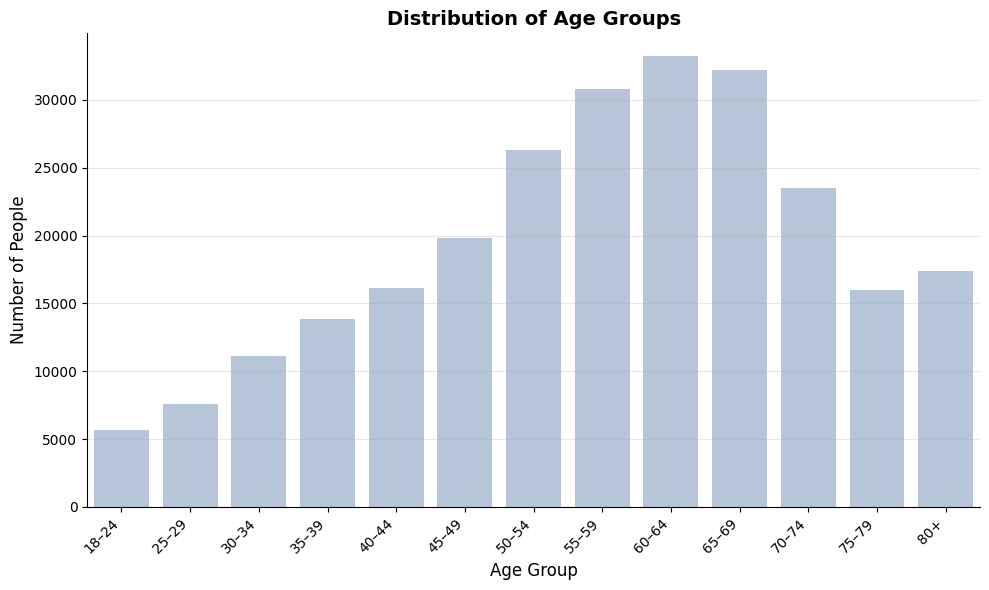

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age_cat', data=df, color="lightsteelblue")

plt.title("Distribution of Age Groups", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of People", fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


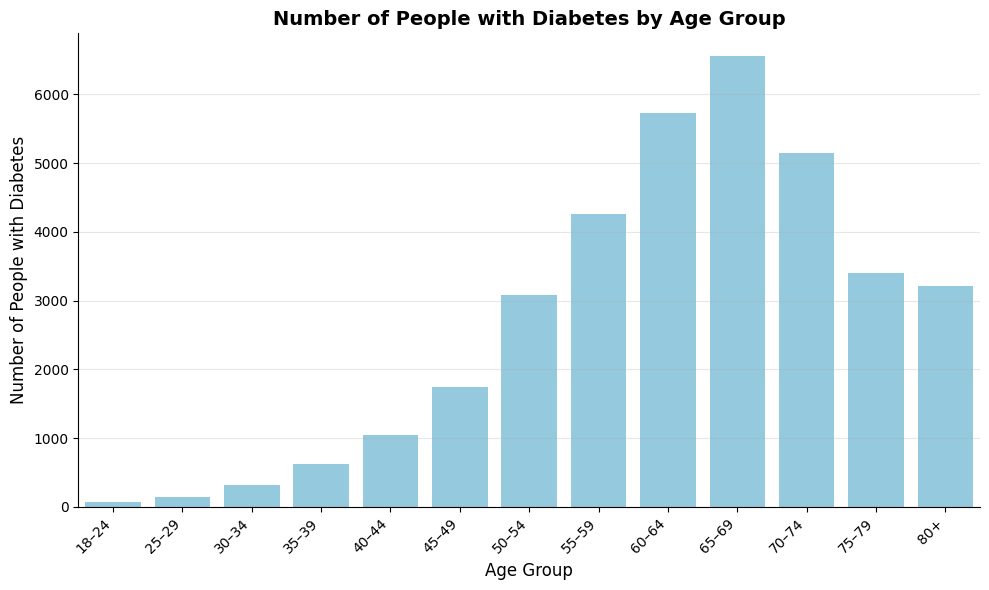

In [ ]:
# Count diabetics per age group
counts_age = (
    df.loc[df['Diabetes_binary'] == 1, 'Age_cat']
      .value_counts()
      .reindex(df['Age_cat'].cat.categories)   # keep the correct order
)

plt.figure(figsize=(10,6))
sns.barplot(x=counts_age.index, y=counts_age.values, color="skyblue")

plt.title("Number of People with Diabetes by Age Group", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of People with Diabetes", fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()


/tmp/ipython-input-505121835.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


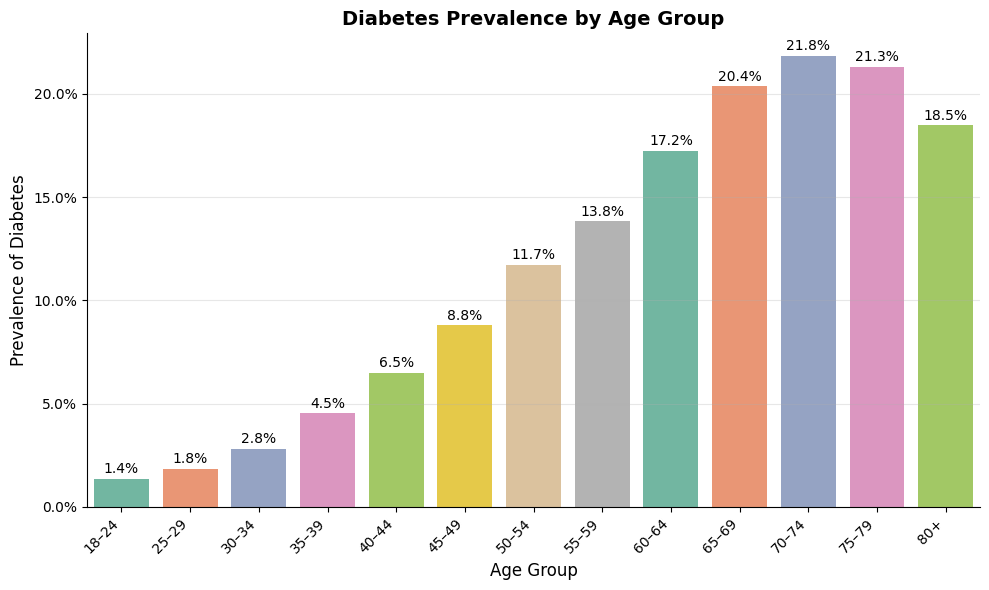

In [ ]:
# Use a professional categorical palette with distinct colors
colors = sns.color_palette("Set2", n_colors=df['Age_cat'].nunique())

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Age_cat',
    y='Diabetes_binary',
    data=df,
    palette=colors,
    errorbar=None
)

ax.set_title("Diabetes Prevalence by Age Group", fontsize=14, fontweight="bold")
ax.set_xlabel("Age Group", fontsize=12)
ax.set_ylabel("Prevalence of Diabetes", fontsize=12)

# Format y-axis as %
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.xticks(rotation=45, ha="right")

# Add data labels
for c in ax.containers:
    labels = [f"{v.get_height()*100:.1f}%" for v in c]
    ax.bar_label(c, labels=labels, padding=2)

sns.despine()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


The graph shows a strong positive relationship between age and diabetes prevalence. In younger age groups (18–34), prevalence is very low, but it rises steadily with age, reaching over 20% among those aged 65 and older. The trend highlights aging as one of the most significant risk factors for diabetes, reflecting both physiological changes and accumulated lifestyle effects over time.

/tmp/ipython-input-1776624599.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


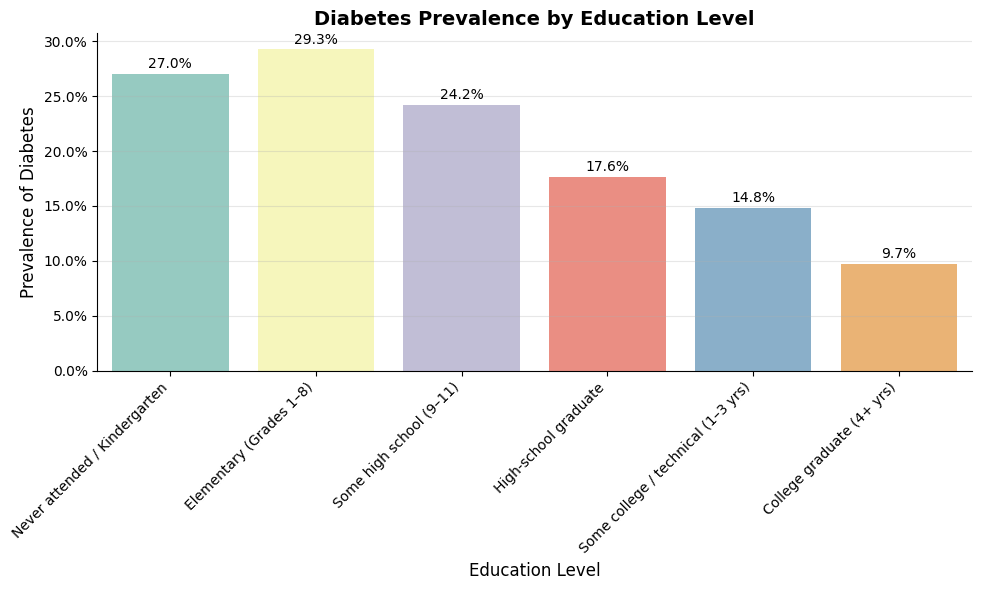

In [ ]:
# Use a categorical palette with distinct colors
colors = sns.color_palette("Set3", n_colors=df['Education_cat'].nunique())

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Education_cat',
    y='Diabetes_binary',
    data=df,
    palette=colors,
    errorbar=None
)

ax.set_title("Diabetes Prevalence by Education Level", fontsize=14, fontweight="bold")
ax.set_xlabel("Education Level", fontsize=12)
ax.set_ylabel("Prevalence of Diabetes", fontsize=12)

# Format y-axis as %
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.xticks(rotation=45, ha="right")

# Add data labels
for c in ax.containers:
    labels = [f"{v.get_height()*100:.1f}%" for v in c]
    ax.bar_label(c, labels=labels, padding=2)

sns.despine()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


The graph shows an inverse relationship between education and diabetes prevalence: individuals with little or no formal education have the highest rates of diabetes (over 25%), while prevalence decreases steadily as education increases, dropping below 10% among college graduates. This trend suggests that higher education may contribute to better health awareness, lifestyle choices, and access to preventive care, making education an important socioeconomic determinant of diabetes risk.

###BMI analysis

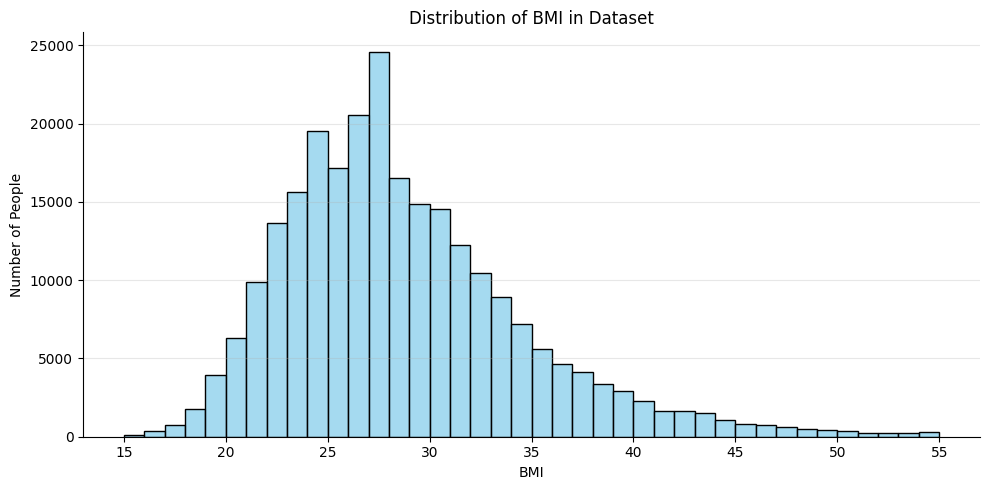

In [ ]:
# Define BMI range and bins
bin_min, bin_max = 15, 55
bins = np.arange(bin_min, bin_max + 1)

# Plot BMI distribution (all individuals)
plt.figure(figsize=(10,5))
sns.histplot(df['BMI'], bins=bins, kde=False, color="skyblue")

plt.title("Distribution of BMI in Dataset")
plt.xlabel("BMI")
plt.ylabel("Number of People")

plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


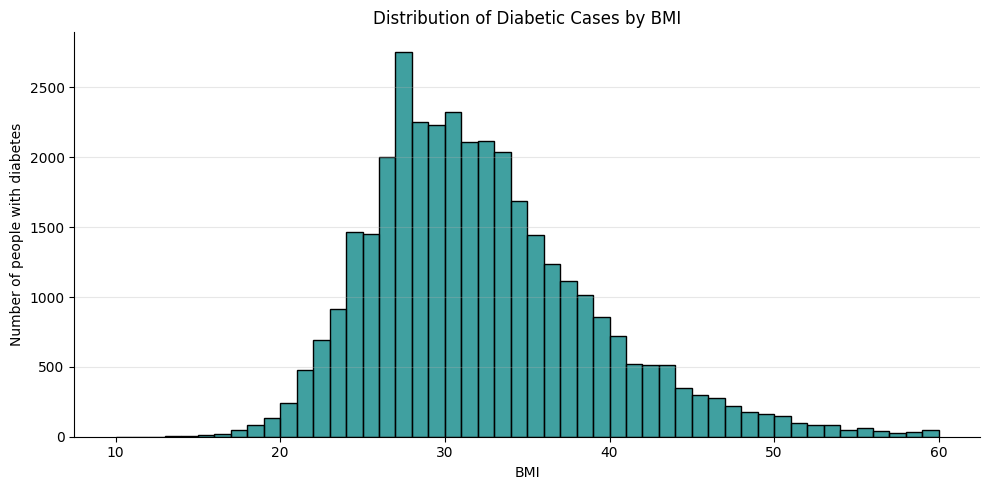

In [ ]:
# Filter BMI values for diabetics only
bmi = df.loc[df['Diabetes_binary'] == 1, 'BMI']

# Define range and bins
bin_min, bin_max = 10, 60
bins = np.arange(bin_min, bin_max + 1, 1)

plt.figure(figsize=(10,5))
sns.histplot(bmi, bins=bins, kde=False, color="teal")

plt.title("Distribution of Diabetic Cases by BMI")
plt.xlabel("BMI")
plt.ylabel("Number of people with diabetes")

plt.grid(axis='y', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()


This graph is misleading because it shows where most diabetics fall in absolute numbers, not the actual risk of diabetes at each BMI level.

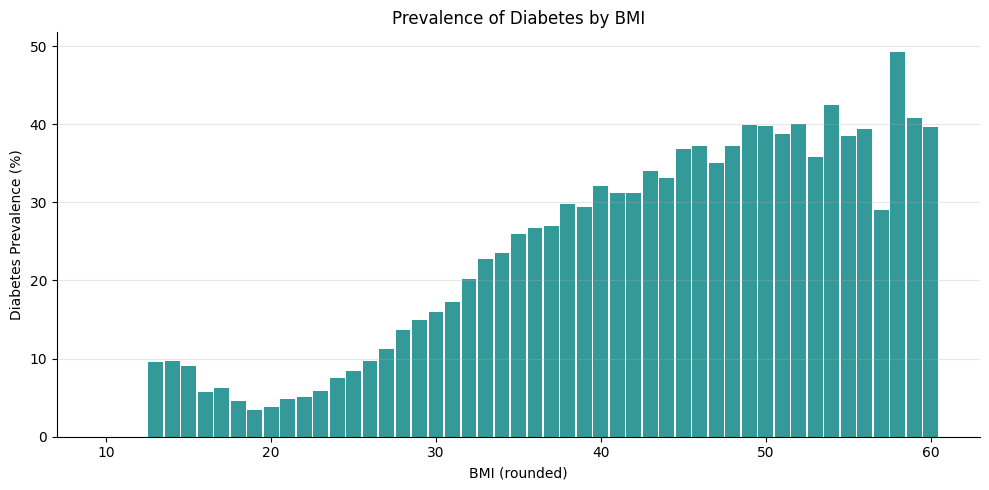

In [ ]:
# Round BMI for binning
df['BMI_rounded'] = df['BMI'].round().astype(int)

# Define bins
bin_min, bin_max = 10, 60
bins = np.arange(bin_min, bin_max + 1)

# Calculate prevalence (%) in each bin
prevalence = []
for b in bins:
    group = df[df['BMI_rounded'] == b]
    if len(group) > 0:
        prevalence.append(100 * group['Diabetes_binary'].mean())
    else:
        prevalence.append(0)

plt.figure(figsize=(10,5))
plt.bar(bins, prevalence, width=0.9, color="teal", alpha=0.8)

plt.title("Prevalence of Diabetes by BMI")
plt.xlabel("BMI (rounded)")
plt.ylabel("Diabetes Prevalence (%)")

plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
# Clinical BMI bins
bmi_bins   = [0, 18.5, 25, 30, 35, 40, float('inf')]
bmi_labels = ['Underweight','Normal','Overweight','Obese I','Obese II','Obese III']

df['BMI_cat'] = pd.Categorical(
    pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False),
    categories=bmi_labels, ordered=True
)

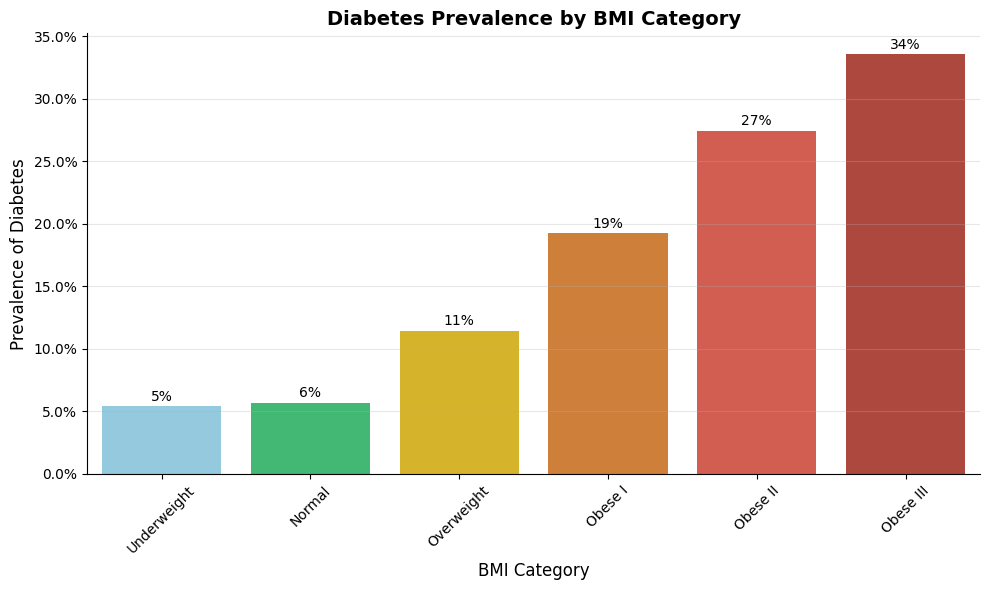

In [ ]:
# Traffic-light palette
color_map = {
    'Underweight': '#87CEEB',  # neutral light blue
    'Normal':      '#2ECC71',  # green
    'Overweight':  '#F1C40F',  # yellow
    'Obese I':     '#E67E22',  # orange
    'Obese II':    '#E74C3C',  # red
    'Obese III':   '#C0392B'   # dark red
}

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='BMI_cat',
    y='Diabetes_binary',
    hue='BMI_cat',
    data=df,
    palette=color_map,
    dodge=False,
    errorbar=None
)

ax.set_title("Diabetes Prevalence by BMI Category", fontsize=14, fontweight="bold")
ax.set_xlabel("BMI Category", fontsize=12)
ax.set_ylabel("Prevalence of Diabetes", fontsize=12)

# Format y-axis as %
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

for c in ax.containers:
    labels = [f"{v.get_height()*100:.0f}%" for v in c]
    ax.bar_label(c, labels=labels, padding=2)

sns.despine()
ax.grid(axis='y', alpha=0.3)
ax.tick_params(axis='x', labelrotation=45)


plt.tight_layout()
plt.show()


The raw counts suggested a peak in diabetes cases around BMI 28, but this was due to population concentration. After normalizing by prevalence, a clear trend appears - diabetes risk rises with BMI, exceeding 40% in the highest categories. Normalization thus reveals the true relationship between BMI and diabetes.

### Health Vs DIABETES

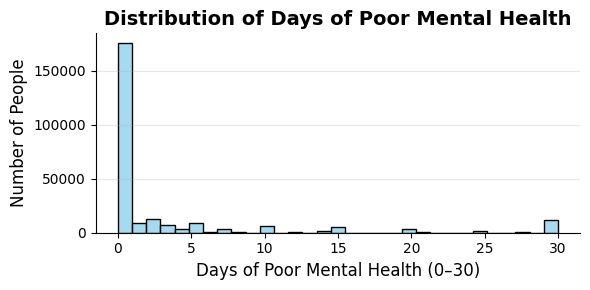

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(df['MentHlth'], bins=31, kde=False, color="skyblue")

plt.title("Distribution of Days of Poor Mental Health", fontsize=14, fontweight="bold")
plt.xlabel("Days of Poor Mental Health (0–30)", fontsize=12)
plt.ylabel("Number of People", fontsize=12)

plt.grid(axis='y', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()


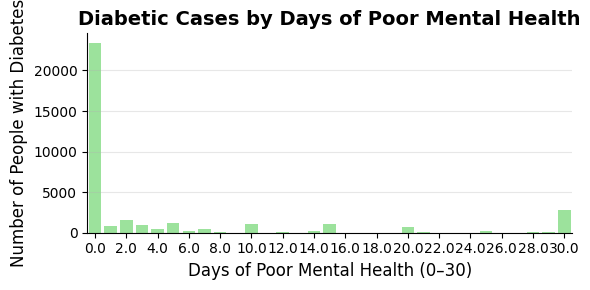

In [ ]:
# Count diabetic cases by number of poor mental health days
counts_ment = (
    df.loc[df['Diabetes_binary'] == 1, 'MentHlth']
        .round()
        .value_counts()
        .sort_index()
)

plt.figure(figsize=(6,3))
sns.barplot(x=counts_ment.index, y=counts_ment.values, color="lightgreen")

plt.title("Diabetic Cases by Days of Poor Mental Health", fontsize=14, fontweight="bold")
plt.xlabel("Days of Poor Mental Health (0–30)", fontsize=12)
plt.ylabel("Number of People with Diabetes", fontsize=12)

plt.xticks(ticks=np.arange(0, 31, 2))

sns.despine()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
#MentHlth (days not good in last 30) to categorical
ment_bins   = [0, 1, 14, 30, 31]
ment_labels = ['0 days', '1–13 days', '14–29 days', '30 days']
df['MentHlth_cat'] = pd.Categorical(
    pd.cut(df['MentHlth'], bins=ment_bins, labels=ment_labels, right=False),
    categories=ment_labels, ordered=True
)


/tmp/ipython-input-2907209221.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


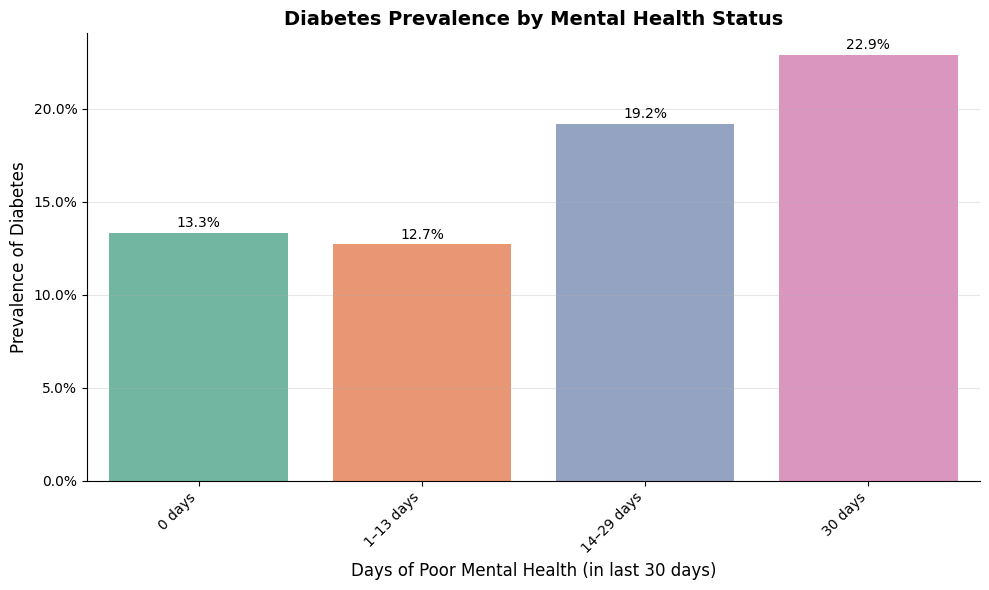

In [ ]:
# Color palette
colors = sns.color_palette("Set2", n_colors=df['MentHlth_cat'].nunique())

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='MentHlth_cat',
    y='Diabetes_binary',
    data=df,
    palette=colors,
    errorbar=None
)

ax.set_title("Diabetes Prevalence by Mental Health Status", fontsize=14, fontweight="bold")
ax.set_xlabel("Days of Poor Mental Health (in last 30 days)", fontsize=12)
ax.set_ylabel("Prevalence of Diabetes", fontsize=12)

# Format y-axis as %
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.xticks(rotation=45, ha="right")

for container in ax.containers:
    ax.bar_label(container, labels=[f"{b.get_height()*100:.1f}%" for b in container], padding=2)

sns.despine()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Most people reported either 0 or 30 poor mental health days, and diabetics clustered in the same groups. After normalizing, a clear trend emerged - diabetes prevalence rises with worsening mental health, from about 13% at 0 days to nearly 23% at 30 days. This shows a strong link between poor mental health and higher diabetes risk.

In [ ]:
# PhysHlth (days not good in last 30) → categorical bins
phys_bins   = [0, 1, 14, 30, 31]
phys_labels = ['0 days', '1–13 days', '14–29 days', '30 days']

df['PhysHlth_cat'] = pd.cut(
    df['PhysHlth'],
    bins=phys_bins,
    labels=phys_labels,
    right=False,
    include_lowest=True
)



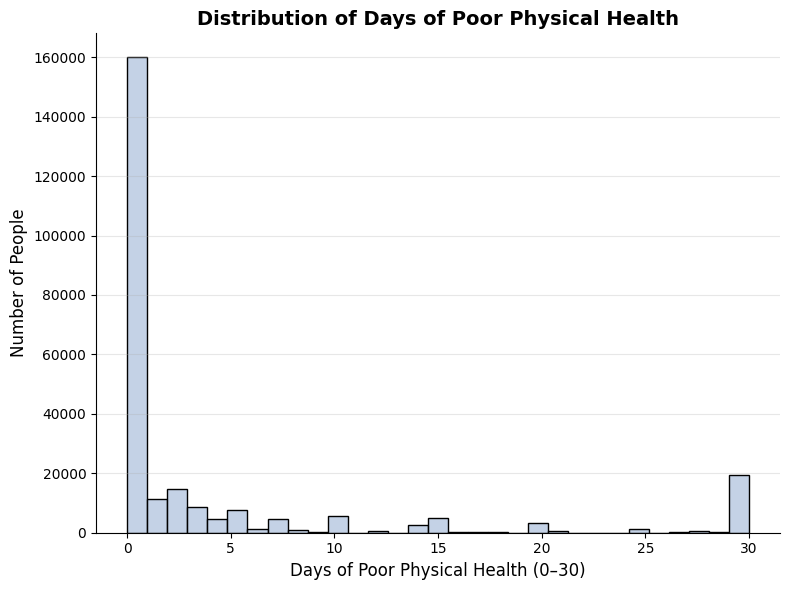

In [ ]:
# Right: Distribution of PhysHlth for ALL people
plt.figure(figsize=(8,6))
sns.histplot(df['PhysHlth'], bins=31, kde=False, color="lightsteelblue")
plt.title("Distribution of Days of Poor Physical Health", fontsize=14, fontweight="bold")
plt.xlabel("Days of Poor Physical Health (0–30)", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

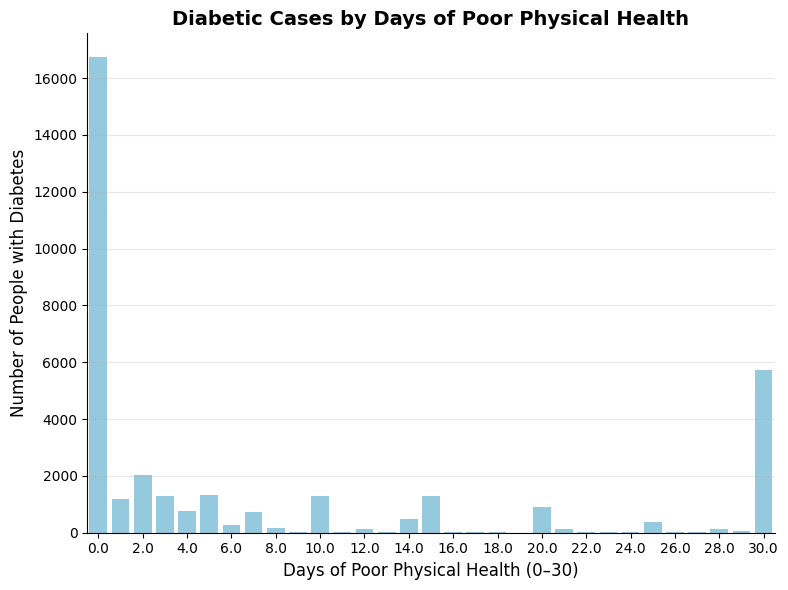

In [ ]:
# Diabetic cases by days of poor physical health
counts_phys = (
    df.loc[df['Diabetes_binary'] == 1, 'PhysHlth']
      .round().value_counts().sort_index()
)

plt.figure(figsize=(8,6))
sns.barplot(x=counts_phys.index, y=counts_phys.values, color="skyblue")
plt.title("Diabetic Cases by Days of Poor Physical Health", fontsize=14, fontweight="bold")
plt.xlabel("Days of Poor Physical Health (0–30)", fontsize=12)
plt.ylabel("Number of People with Diabetes", fontsize=12)
plt.xticks(np.arange(0, 31, 2))
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

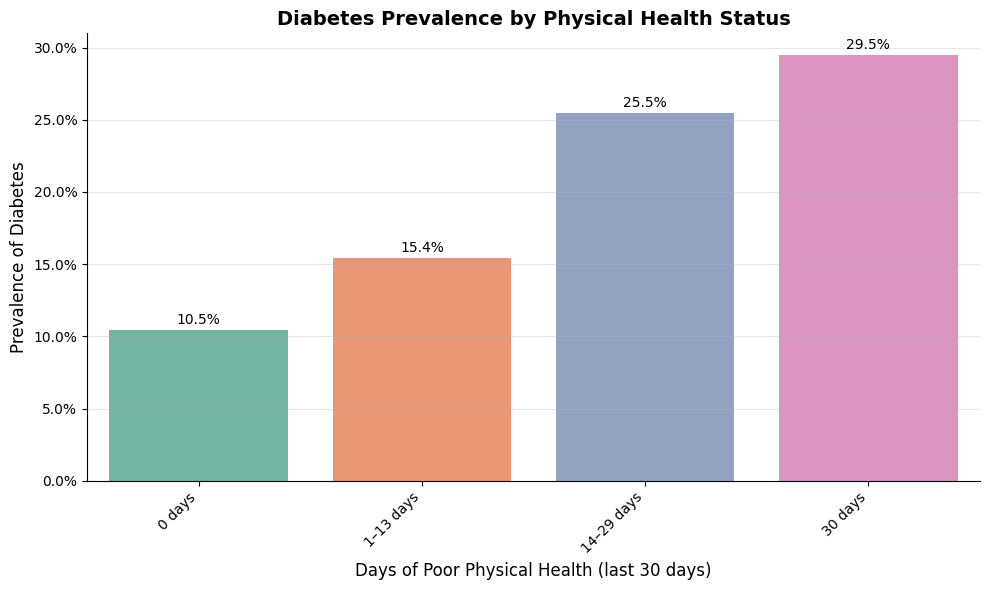

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    x='PhysHlth_cat', y='Diabetes_binary',
    hue='PhysHlth_cat',
    palette=sns.color_palette("Set2", n_colors=len(phys_labels)),
    dodge=False, legend=False, errorbar=None
)

ax.set_title("Diabetes Prevalence by Physical Health Status", fontsize=14, fontweight="bold")
ax.set_xlabel("Days of Poor Physical Health (last 30 days)", fontsize=12)
ax.set_ylabel("Prevalence of Diabetes", fontsize=12)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(rotation=45, ha="right")

for container in ax.containers:
    ax.bar_label(container, labels=[f"{b.get_height()*100:.1f}%" for b in container], padding=2)

sns.despine()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


We first plotted the distribution of poor physical health days to see where the population concentrates (mostly at 0 and 30) and compared it with the raw counts of diabetics by day, which showed similar clustering driven by group size. To correct for this, we normalized by computing diabetes prevalence within each PhysHlth category. The normalized chart shows a clear gradient: prevalence rises markedly with more poor-health days, increasing from about 10% at 0 days to around 30% at 30 days, providing an actionable signal for modeling.


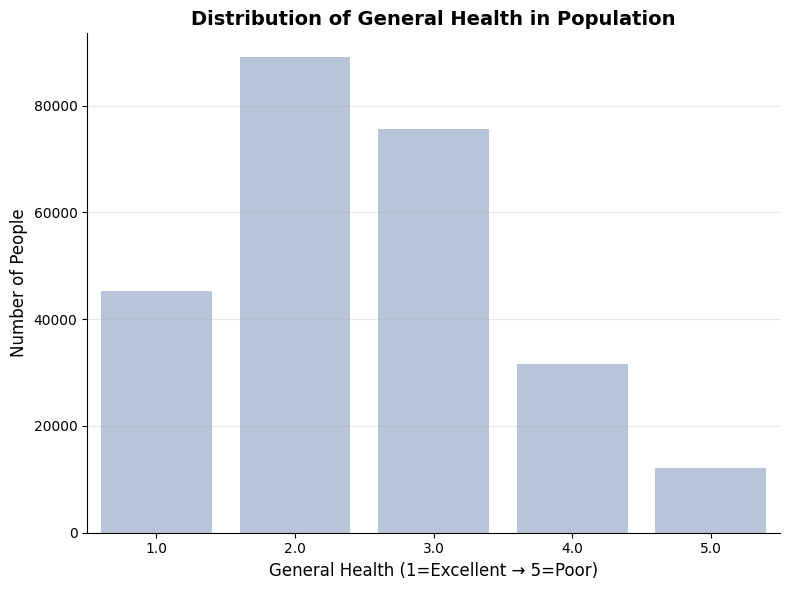

In [ ]:
# Distribution of general health (all people)
plt.figure(figsize=(8,6))
sns.countplot(x='GenHlth', data=df, color="lightsteelblue")
plt.title("Distribution of General Health in Population", fontsize=14, fontweight="bold")
plt.xlabel("General Health (1=Excellent → 5=Poor)", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


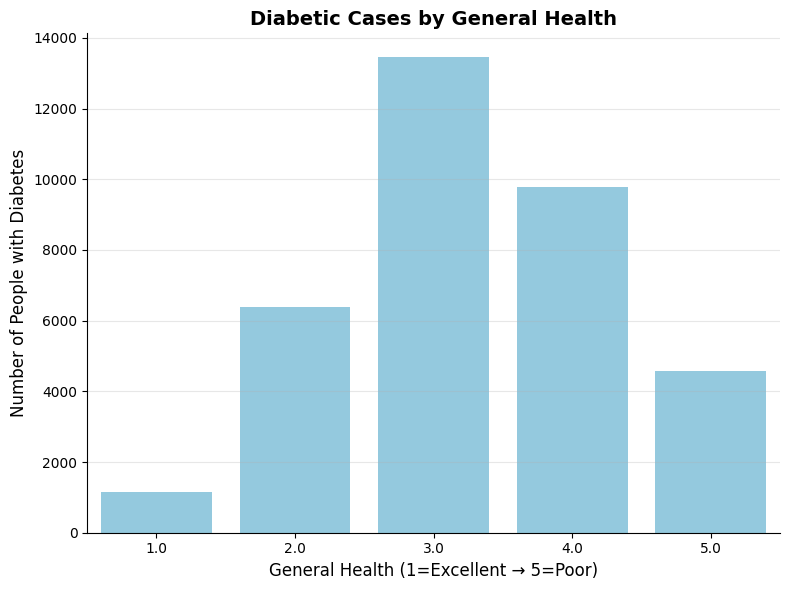

In [ ]:
# Diabetic cases by general health category
counts_gen = (
    df.loc[df['Diabetes_binary'] == 1, 'GenHlth']
      .value_counts().sort_index()
)

plt.figure(figsize=(8,6))
sns.barplot(x=counts_gen.index, y=counts_gen.values, color="skyblue")
plt.title("Diabetic Cases by General Health", fontsize=14, fontweight="bold")
plt.xlabel("General Health (1=Excellent → 5=Poor)", fontsize=12)
plt.ylabel("Number of People with Diabetes", fontsize=12)
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

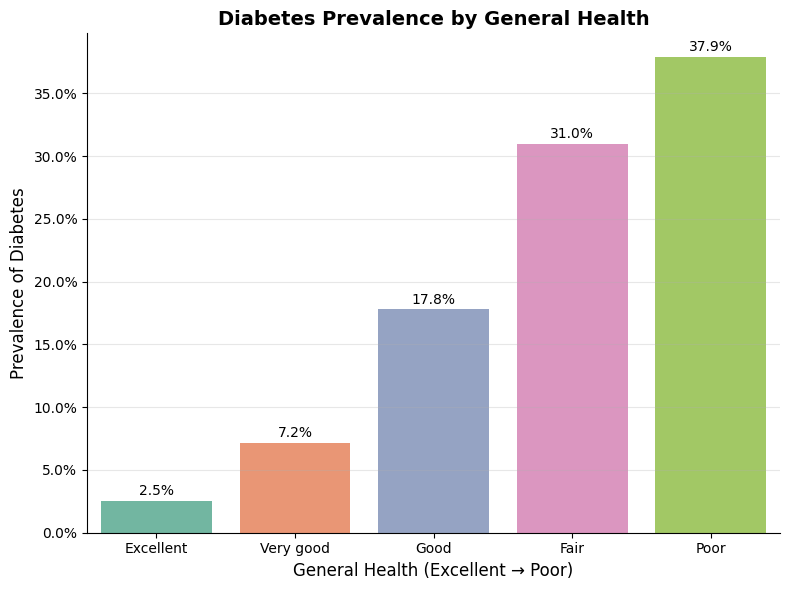

In [ ]:
# Define bins/labels and build the categorical column
gen_bins   = [1, 2, 3, 4, 5, 6]
gen_labels = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

df['GenHlth_cat'] = pd.Categorical(
    pd.cut(pd.to_numeric(df['GenHlth'], errors='coerce').clip(1, 5),
           bins=gen_bins, labels=gen_labels, right=False),
    categories=gen_labels, ordered=True
)

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=df,
    x='GenHlth_cat', y='Diabetes_binary',
    hue='GenHlth_cat',
    palette=sns.color_palette("Set2", n_colors=len(gen_labels)),
    dodge=False, legend=False, errorbar=None
)

ax.set_title("Diabetes Prevalence by General Health", fontsize=14, fontweight="bold")
ax.set_xlabel("General Health (Excellent → Poor)", fontsize=12)
ax.set_ylabel("Prevalence of Diabetes", fontsize=12)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

for container in ax.containers:
    ax.bar_label(container, labels=[f"{b.get_height()*100:.1f}%" for b in container], padding=2)

sns.despine()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Comparing the population distribution of GenHlth with the raw number of diabetics shows higher counts in larger groups, especially among those reporting "fair" or "poor" health. Because raw counts track group size, we normalized to within-category prevalence. The normalized view shows a steep gradient: prevalence is very low among respondents with excellent health and exceeds 30% among those reporting poor health, highlighting general health as a strong predictor of diabetes risk.

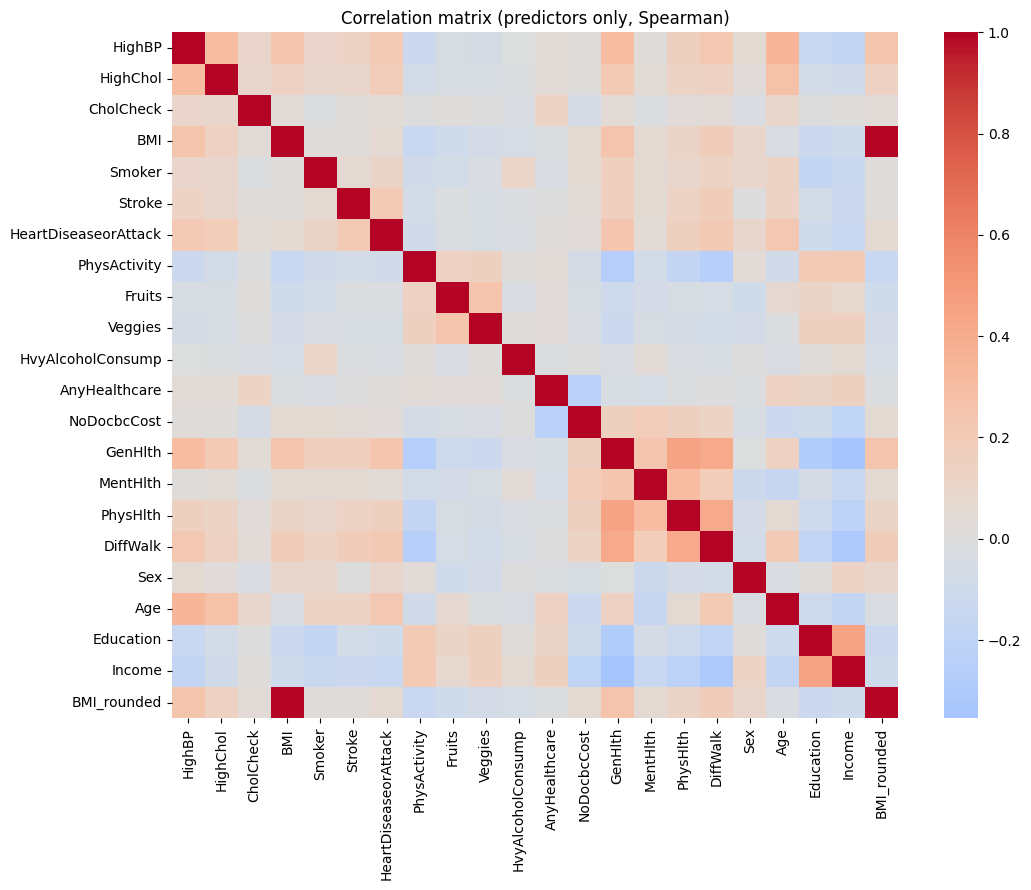

In [ ]:
# predictors-only, drop constants, and use Spearman
preds = df.select_dtypes('number').drop(columns=['Diabetes_binary'], errors='ignore')
preds = preds.loc[:, preds.nunique(dropna=True) > 1]

corr = preds.corr(method='spearman')

plt.figure(figsize=(11, 9))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation matrix (predictors only, Spearman)')
plt.tight_layout()
plt.show()

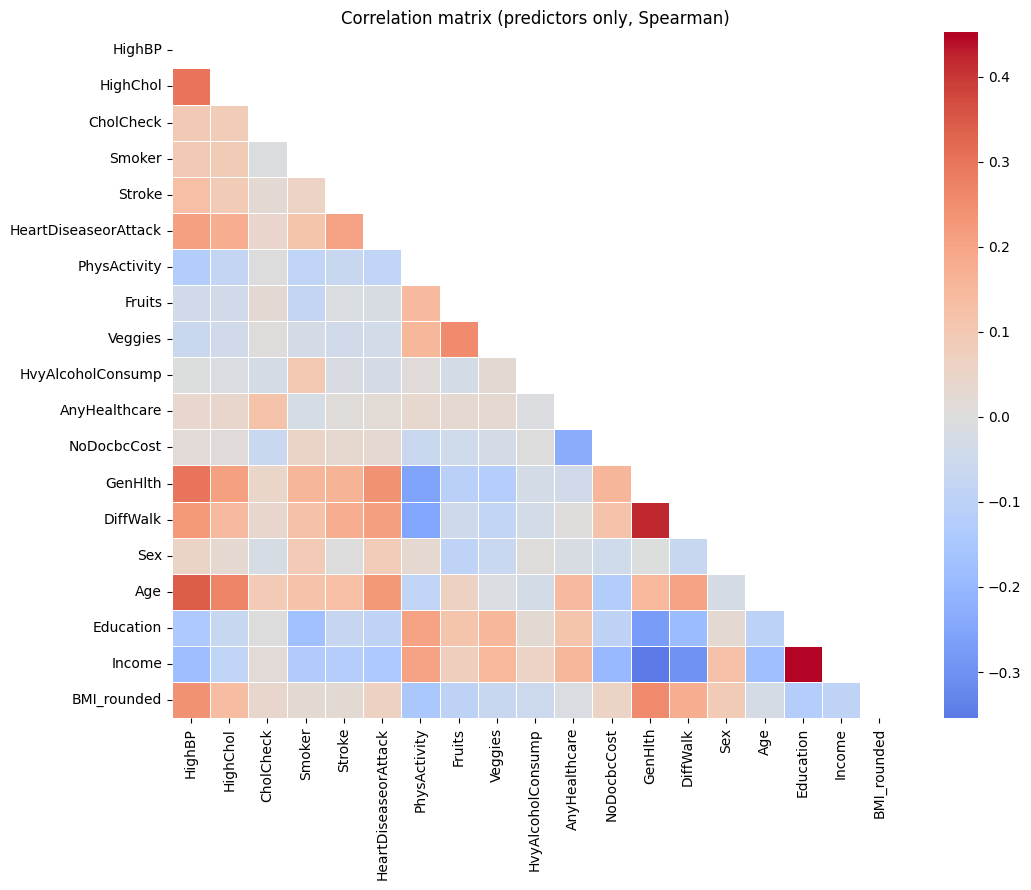

In [ ]:
# keep cleaned versions; drop raw duplicates
drop_raw = ['BMI','MentHlth','PhysHlth']
preds = df.select_dtypes('number').drop(columns=['Diabetes_binary'] + drop_raw, errors='ignore')
preds = preds.loc[:, preds.nunique(dropna=True) > 1]

corr = preds.corr(method='spearman')

mask = np.triu(np.ones_like(corr, dtype=bool))   # hide upper triangle
plt.figure(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation matrix (predictors only, Spearman)')
plt.tight_layout(); plt.show()

The correlation matrix highlights BMI, high blood pressure, and heart disease or stroke as the strongest predictors of diabetes. Moderate correlations appear with cholesterol, mobility issues, and mental health, while factors like smoking, alcohol, and healthcare coverage show weak links. Overall, it confirms that metabolic and heart-related factors dominate diabetes risk. Importantly, we did not rely solely on the seemingly weak correlations here to exclude variables, but later validated their contribution using exact measures.

## Data Preparation

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       253680 non-null  float64 
 1   HighBP                253680 non-null  float64 
 2   HighChol              253680 non-null  float64 
 3   CholCheck             253680 non-null  float64 
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  float64 
 6   Stroke                253680 non-null  float64 
 7   HeartDiseaseorAttack  253680 non-null  float64 
 8   PhysActivity          253680 non-null  float64 
 9   Fruits                253680 non-null  float64 
 10  Veggies               253680 non-null  float64 
 11  HvyAlcoholConsump     253680 non-null  float64 
 12  AnyHealthcare         253680 non-null  float64 
 13  NoDocbcCost           253680 non-null  float64 
 14  GenHlth               253680 non-nul

In [ ]:
to_drop = ['Fruits' ,'Veggies','Sex', 'NoDocbcCost', 'AnyHealthcare', 'BMI_rounded']

In [ ]:
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       253680 non-null  float64 
 1   HighBP                253680 non-null  float64 
 2   HighChol              253680 non-null  float64 
 3   CholCheck             253680 non-null  float64 
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  float64 
 6   Stroke                253680 non-null  float64 
 7   HeartDiseaseorAttack  253680 non-null  float64 
 8   PhysActivity          253680 non-null  float64 
 9   HvyAlcoholConsump     253680 non-null  float64 
 10  GenHlth               253680 non-null  float64 
 11  MentHlth              253680 non-null  float64 
 12  PhysHlth              253680 non-null  float64 
 13  DiffWalk              253680 non-null  float64 
 14  Age                   253680 non-nul

In [ ]:
def should_drop(col):
    gap  = abs(df.loc[df[col]==1,'Diabetes_binary'].mean()
               - df.loc[df[col]==0,'Diabetes_binary'].mean())
    return (gap < 0.07)

bin_cols = [c for c in df.columns
            if c != 'Diabetes_binary'
            and pd.api.types.is_numeric_dtype(df[c])
            and df[c].dropna().isin([0,1]).all()]

for c in bin_cols:
    print(c, 'DROP' if should_drop(c) else 'KEEP')


HighBP KEEP
HighChol KEEP
CholCheck KEEP
Smoker DROP
Stroke KEEP
HeartDiseaseorAttack KEEP
PhysActivity KEEP
HvyAlcoholConsump KEEP
DiffWalk KEEP


Rule: for each 0/1 feature, we check how much the diabetes rate differs between the “1” group and the “0” group.
If that gap is under 7 percentage points, we drop the feature as too weak.
Why 7%? It kept features with a clear effect in our charts and removed the near-flat ones, giving a simpler model without losing useful signal.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       253680 non-null  float64 
 1   HighBP                253680 non-null  float64 
 2   HighChol              253680 non-null  float64 
 3   CholCheck             253680 non-null  float64 
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  float64 
 6   Stroke                253680 non-null  float64 
 7   HeartDiseaseorAttack  253680 non-null  float64 
 8   PhysActivity          253680 non-null  float64 
 9   HvyAlcoholConsump     253680 non-null  float64 
 10  GenHlth               253680 non-null  float64 
 11  MentHlth              253680 non-null  float64 
 12  PhysHlth              253680 non-null  float64 
 13  DiffWalk              253680 non-null  float64 
 14  Age                   253680 non-nul

In [ ]:
binary_columns = [col for col in df.columns
                  if df[col].nunique(dropna=True) == 2]

print("Binary columns:", binary_columns)

Binary columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'DiffWalk']


In [ ]:
#converting binary columns into integer
df[binary_columns] = df[binary_columns].astype(int)

In [ ]:
#find non numeric binary columns
# Then filter out non-numeric ones
non_numeric_binary = [col for col in binary_columns
                      if not pd.api.types.is_numeric_dtype(df[col])]

print("Non-numeric binary columns:", non_numeric_binary)

Non-numeric binary columns: []


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       253680 non-null  int64   
 1   HighBP                253680 non-null  int64   
 2   HighChol              253680 non-null  int64   
 3   CholCheck             253680 non-null  int64   
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  int64   
 6   Stroke                253680 non-null  int64   
 7   HeartDiseaseorAttack  253680 non-null  int64   
 8   PhysActivity          253680 non-null  int64   
 9   HvyAlcoholConsump     253680 non-null  int64   
 10  GenHlth               253680 non-null  float64 
 11  MentHlth              253680 non-null  float64 
 12  PhysHlth              253680 non-null  float64 
 13  DiffWalk              253680 non-null  int64   
 14  Age                   253680 non-nul

In [ ]:
# Step 1: Get all numeric columns
numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
print("Numeric columns:", numeric_columns)

Numeric columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']


In [ ]:
# Step 2: Filter out binary (only 2 unique values)
non_binary_numeric = [col for col in numeric_columns if df[col].nunique(dropna=True) > 2]

print("Numeric columns that are not binary:", non_binary_numeric)

Numeric columns that are not binary: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


In [ ]:
#dropping 'Age', 'Education', 'Income',GenHlth (we have them in category)
non_binary_numeric = [col for col in non_binary_numeric if col not in ['Age', 'Education', 'Income','GenHlth']]

print("Numeric columns that are not binary after dropping Age, Education, and Income:", non_binary_numeric)

Numeric columns that are not binary after dropping Age, Education, and Income: ['BMI', 'MentHlth', 'PhysHlth']


In [ ]:
# Manual Min-Max scaling that keeps the original
normalized_cols = []          # list to track new column names

for col in non_binary_numeric:
    min_val = df[col].min()
    max_val = df[col].max()
    new_col = col + '_norm'   # name for the normalized version

    if min_val == max_val:    # avoid division by zero
        df[new_col] = 0
    else:
        df[new_col] = (df[col] - min_val) / (max_val - min_val)

    normalized_cols.append(new_col)

print("Normalized columns:", normalized_cols)

Normalized columns: ['BMI_norm', 'MentHlth_norm', 'PhysHlth_norm']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       253680 non-null  int64   
 1   HighBP                253680 non-null  int64   
 2   HighChol              253680 non-null  int64   
 3   CholCheck             253680 non-null  int64   
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  int64   
 6   Stroke                253680 non-null  int64   
 7   HeartDiseaseorAttack  253680 non-null  int64   
 8   PhysActivity          253680 non-null  int64   
 9   HvyAlcoholConsump     253680 non-null  int64   
 10  GenHlth               253680 non-null  float64 
 11  MentHlth              253680 non-null  float64 
 12  PhysHlth              253680 non-null  float64 
 13  DiffWalk              253680 non-null  int64   
 14  Age                   253680 non-nul

In [ ]:
cats_to_drop = ['BMI_cat','MentHlth_cat','PhysHlth_cat']
df.drop(cats_to_drop, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       253680 non-null  int64   
 1   HighBP                253680 non-null  int64   
 2   HighChol              253680 non-null  int64   
 3   CholCheck             253680 non-null  int64   
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  int64   
 6   Stroke                253680 non-null  int64   
 7   HeartDiseaseorAttack  253680 non-null  int64   
 8   PhysActivity          253680 non-null  int64   
 9   HvyAlcoholConsump     253680 non-null  int64   
 10  GenHlth               253680 non-null  float64 
 11  MentHlth              253680 non-null  float64 
 12  PhysHlth              253680 non-null  float64 
 13  DiffWalk              253680 non-null  int64   
 14  Age                   253680 non-nul

In [ ]:
# Step 1: Identify non-numeric columns
non_numeric_columns = [col for col in df.columns
                       if not pd.api.types.is_numeric_dtype(df[col])]
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: ['Age_cat', 'Education_cat', 'Income_cat', 'GenHlth_cat']


In [ ]:
# Step 2: One-hot encode with dtype=int to force 0/1
df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True, dtype=int)

print("One-hot encoding complete with 0/1 values. New shape:", df.shape)

One-hot encoding complete with 0/1 values. New shape: (253680, 48)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 48 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Diabetes_binary                                   253680 non-null  int64  
 1   HighBP                                            253680 non-null  int64  
 2   HighChol                                          253680 non-null  int64  
 3   CholCheck                                         253680 non-null  int64  
 4   BMI                                               253680 non-null  float64
 5   Smoker                                            253680 non-null  int64  
 6   Stroke                                            253680 non-null  int64  
 7   HeartDiseaseorAttack                              253680 non-null  int64  
 8   PhysActivity                                      253680 non-null  int64  
 9   HvyA

In [ ]:
df_final = df.drop(columns = ['Age', 'Education', 'Income','GenHlth','BMI','PhysHlth','MentHlth',])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 41 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Diabetes_binary                                   253680 non-null  int64  
 1   HighBP                                            253680 non-null  int64  
 2   HighChol                                          253680 non-null  int64  
 3   CholCheck                                         253680 non-null  int64  
 4   Smoker                                            253680 non-null  int64  
 5   Stroke                                            253680 non-null  int64  
 6   HeartDiseaseorAttack                              253680 non-null  int64  
 7   PhysActivity                                      253680 non-null  int64  
 8   HvyAlcoholConsump                                 253680 non-null  int64  
 9   Diff

## Modeling & Evaluation

---



In [ ]:
from sklearn.model_selection import train_test_split
import torch

In [ ]:
#speparate the target colums from the rest
X = df_final.drop(columns=['Diabetes_binary'])
Y = df_final['Diabetes_binary']

In [ ]:
#Split train test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
print("Train class ratio:\n", Y_train.value_counts(normalize=True))
print("Test  class ratio:\n", Y_test.value_counts(normalize=True))

Train class ratio:
 Diabetes_binary
0    0.860666
1    0.139334
Name: proportion, dtype: float64
Test  class ratio:
 Diabetes_binary
0    0.860671
1    0.139329
Name: proportion, dtype: float64


In [ ]:
X_test_tensor = torch.tensor(X_test.values, dtype = torch.float32)
Y_test_tensor = torch.tensor(Y_test.values, dtype = torch.float32).unsqueeze(1) ##.unsqueeze(1) - change shape from (N) to (N,1)
print(X_test_tensor.shape)
print(Y_test_tensor.shape)

torch.Size([50736, 40])
torch.Size([50736, 1])


In [ ]:
X_train_tensor_reg = torch.tensor(X_train.values, dtype = torch.float32)
Y_train_tensor_reg = torch.tensor(Y_train.values, dtype = torch.float32).unsqueeze(1) ##.unsqueeze(1) - change shape from (N) to (N,1)

In [ ]:
#check shapes
print(X_train_tensor_reg.shape)
print(Y_train_tensor_reg.shape)

torch.Size([202944, 40])
torch.Size([202944, 1])


In [ ]:
import torch.nn as nn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

###Pre Undersampling Model

In [ ]:
class DiabetesClassifier1(nn.Module):
  def __init__(self,input_dim,hidden_dim = 64, dropout = 0.3):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(input_dim,hidden_dim),
        nn.BatchNorm1d(hidden_dim),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_dim,hidden_dim),
        nn.BatchNorm1d(hidden_dim),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_dim,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.model(x)

In [ ]:
#plotting confusions matrix nicely
def plot_confusion_matrix(cm, display_labels, title = "Confusion Matrix"):
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
  flg, ax = plt.subplots(figsize = (8,6))
  disp.plot(ax=ax, cmap="Blues", values_format='d')
  plt.title(title)
  plt.show()

In [ ]:
#Building model object
InputDim_reg = X_train_tensor_reg.shape[1]
model_reg = DiabetesClassifier1(InputDim_reg)
criterion_reg = nn.BCELoss()
optimizer_reg = torch.optim.Adam(model_reg.parameters(), lr = 0.001)

In [ ]:
#Hyper parametrs
epochs_reg = 20
batch_size_reg = 64
device_reg = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
#Define data loader
train_data_set_reg = torch.utils.data.TensorDataset(X_train_tensor_reg, Y_train_tensor_reg)
train_loader_reg = torch.utils.data.DataLoader(train_data_set_reg, batch_size= batch_size_reg, shuffle=True)

In [ ]:
train_losses_reg = []
# Training Loop
for epoch in range(epochs_reg):
    model_reg.train() #train mode

    epoch_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader_reg:
        X_batch = X_batch.to(device_reg)
        y_batch = y_batch.to(device_reg)

        # Forward
        # outputs are probabilities in the range 0-1
        outputs = model_reg(X_batch) # runs forward

        # Compute loss function
        loss = criterion_reg(outputs, y_batch)

        # Backward
        optimizer_reg.zero_grad()
        loss.backward()

        # Update paraneters
        optimizer_reg.step()

        epoch_loss += loss.item() * X_batch.size(0)

        # Compute accuracy

        # 0.5 is the decision boundary
        preds = (outputs >= 0.5).float()

        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    epoch_loss /= len(train_loader_reg.dataset)
    train_losses_reg.append(epoch_loss)
    accuracy = correct / total

    print(f"Epoch {epoch+1}/{epochs_reg} | Loss: {epoch_loss:.4f} | Accuracy: {accuracy:.4f}")

Epoch 1/20 | Loss: 0.3381 | Accuracy: 0.8570
Epoch 2/20 | Loss: 0.3226 | Accuracy: 0.8628
Epoch 3/20 | Loss: 0.3203 | Accuracy: 0.8637
Epoch 4/20 | Loss: 0.3185 | Accuracy: 0.8644
Epoch 5/20 | Loss: 0.3186 | Accuracy: 0.8636
Epoch 6/20 | Loss: 0.3182 | Accuracy: 0.8642
Epoch 7/20 | Loss: 0.3177 | Accuracy: 0.8647
Epoch 8/20 | Loss: 0.3172 | Accuracy: 0.8650
Epoch 9/20 | Loss: 0.3169 | Accuracy: 0.8642
Epoch 10/20 | Loss: 0.3167 | Accuracy: 0.8650
Epoch 11/20 | Loss: 0.3165 | Accuracy: 0.8648
Epoch 12/20 | Loss: 0.3164 | Accuracy: 0.8650
Epoch 13/20 | Loss: 0.3162 | Accuracy: 0.8651
Epoch 14/20 | Loss: 0.3157 | Accuracy: 0.8647
Epoch 15/20 | Loss: 0.3165 | Accuracy: 0.8648
Epoch 16/20 | Loss: 0.3159 | Accuracy: 0.8649
Epoch 17/20 | Loss: 0.3160 | Accuracy: 0.8650
Epoch 18/20 | Loss: 0.3157 | Accuracy: 0.8653
Epoch 19/20 | Loss: 0.3155 | Accuracy: 0.8653
Epoch 20/20 | Loss: 0.3152 | Accuracy: 0.8655


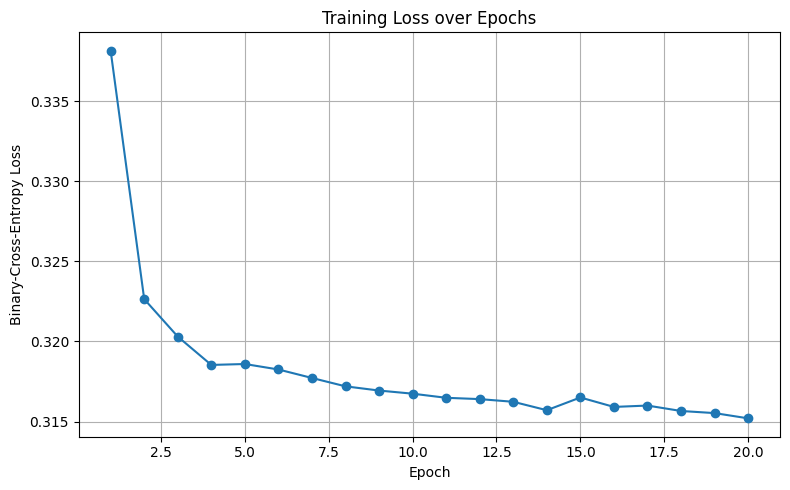

In [ ]:
#Plot training loss curve
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs_reg + 1), train_losses_reg, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary-Cross-Entropy Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluation on test set
model_reg.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device_reg)
    Y_test_tensor = Y_test_tensor.to(device_reg)

    test_outputs_reg = model_reg(X_test_tensor)

    # Decision boundary 0.5
    test_preds_reg = (test_outputs_reg >= 0.5).float()
    test_accuracy_reg = (test_preds_reg == Y_test_tensor).float().mean().item()

print(f"\nTest Accuracy: {test_accuracy_reg:.4f}")


Test Accuracy: 0.8652


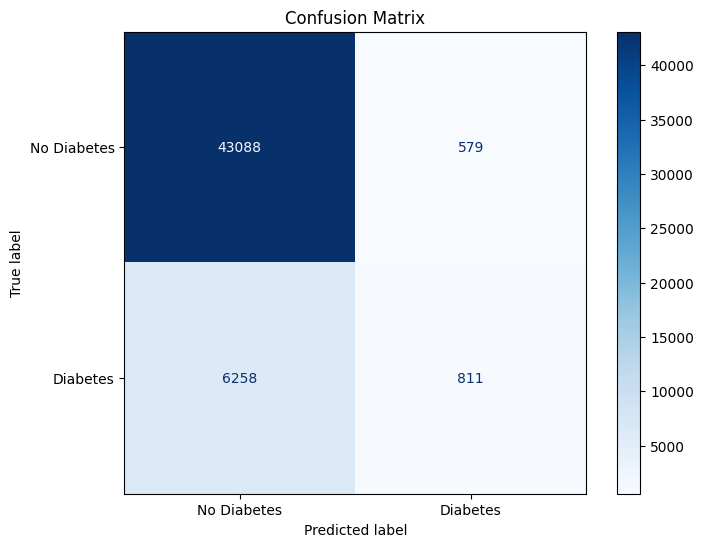

In [ ]:
y_true_reg = Y_test_tensor.numpy()
cm_reg = confusion_matrix(y_true_reg, test_preds_reg)
class_names = ['No Diabetes', 'Diabetes']
plot_confusion_matrix(cm_reg, display_labels=class_names)

In [ ]:
TP_reg = cm_reg[1,1]; TN_reg = cm_reg[0,0]; FN_reg = cm_reg[1,0]; FP_reg = cm_reg[0,1]
Precision_reg = TP_reg / (TP_reg + FP_reg + 1e-12)
Recall_reg    = TP_reg / (TP_reg + FN_reg + 1e-12)
print("Precision_reg:", Precision_reg)
print("Recall_reg:",    Recall_reg)

Precision_reg: 0.5834532374100716
Recall_reg: 0.11472626962795301


A simple neural network with two hidden layers of 64 units each. Each hidden layer uses batch normalization, ReLU, and dropout (p=0.3). The output layer is a single sigmoid unit. Trained with BCE loss and Adam (lr=0.001) for 20 epochs with batch size 64 (shuffled each epoch). Evaluated on the test set with a 0.5 threshold. reported accuracy and a confusion matrix.

Because the training data is imbalanced, the model mostly predicts “no diabetes” to minimize loss. This can keep accuracy looking okay but causes poor recall for the diabetes class (many false negatives in the confusion matrix). To address this class imbalance, we move to undersampling the majority class and retrain so the model pays more attention to the minority (diabetes) cases.

## Undersampling Modeling (75:25 Strategy)



In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(sampling_strategy=0.3, random_state=42)
X_train_bal, Y_train_bal = rus.fit_resample(X_train, Y_train)

print("\nAfter undersampling (train):")
print(Y_train_bal.value_counts())
print(Y_train_bal.value_counts(normalize=True))


After undersampling (train):
Diabetes_binary
0    94256
1    28277
Name: count, dtype: int64
Diabetes_binary
0    0.76923
1    0.23077
Name: proportion, dtype: float64


In [ ]:
#Convert to tensors
X_train_tensor_bal = torch.tensor(X_train_bal.values, dtype = torch.float32)
Y_train_tensor_bal = torch.tensor(Y_train_bal.values, dtype = torch.float32).unsqueeze(1) ##.unsqueeze(1) - change shape from (N) to (N,1)


In [ ]:
#check shapes
print(X_train_tensor_bal.shape)
print(Y_train_tensor_bal.shape)

torch.Size([122533, 40])
torch.Size([122533, 1])


#Model 1


In [ ]:
#Building model object
InputDim1 = X_train_tensor_bal.shape[1]
model1 = DiabetesClassifier1(InputDim1)
criterion1 = nn.BCELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr = 0.001)

In [ ]:
#Hyper parametrs
epochs1 = 20
batch_size1 = 64
device1 = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
#Define data loader
train_data_set1 = torch.utils.data.TensorDataset(X_train_tensor_bal, Y_train_tensor_bal)
train_loader1 = torch.utils.data.DataLoader(train_data_set1, batch_size= batch_size1, shuffle=True)

In [ ]:
train_losses = []
# Training Loop
for epoch in range(epochs1):
    model1.train() #train mode

    epoch_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader1:
        X_batch = X_batch.to(device1)
        y_batch = y_batch.to(device1)

        # Forward
        # outputs are probabilities in the range 0-1
        outputs = model1(X_batch) # runs forward

        # Compute loss function
        loss = criterion1(outputs, y_batch)

        # Backward
        optimizer1.zero_grad()
        loss.backward()

        # Update paraneters
        optimizer1.step()

        epoch_loss += loss.item() * X_batch.size(0)

        # Compute accuracy

        # 0.5 is the decision boundary
        preds = (outputs >= 0.5).float()

        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    epoch_loss /= len(train_loader1.dataset)
    train_losses.append(epoch_loss)
    accuracy = correct / total

    print(f"Epoch {epoch+1}/{epochs1} | Loss: {epoch_loss:.4f} | Accuracy: {accuracy:.4f}")

Epoch 1/20 | Loss: 0.4337 | Accuracy: 0.7891
Epoch 2/20 | Loss: 0.4200 | Accuracy: 0.7970
Epoch 3/20 | Loss: 0.4174 | Accuracy: 0.7985
Epoch 4/20 | Loss: 0.4162 | Accuracy: 0.8000
Epoch 5/20 | Loss: 0.4150 | Accuracy: 0.8010
Epoch 6/20 | Loss: 0.4143 | Accuracy: 0.8006
Epoch 7/20 | Loss: 0.4136 | Accuracy: 0.8015
Epoch 8/20 | Loss: 0.4122 | Accuracy: 0.8019
Epoch 9/20 | Loss: 0.4124 | Accuracy: 0.8028
Epoch 10/20 | Loss: 0.4119 | Accuracy: 0.8027
Epoch 11/20 | Loss: 0.4122 | Accuracy: 0.8024
Epoch 12/20 | Loss: 0.4117 | Accuracy: 0.8028
Epoch 13/20 | Loss: 0.4109 | Accuracy: 0.8034
Epoch 14/20 | Loss: 0.4112 | Accuracy: 0.8031
Epoch 15/20 | Loss: 0.4109 | Accuracy: 0.8033
Epoch 16/20 | Loss: 0.4110 | Accuracy: 0.8034
Epoch 17/20 | Loss: 0.4103 | Accuracy: 0.8037
Epoch 18/20 | Loss: 0.4100 | Accuracy: 0.8037
Epoch 19/20 | Loss: 0.4101 | Accuracy: 0.8034
Epoch 20/20 | Loss: 0.4111 | Accuracy: 0.8035


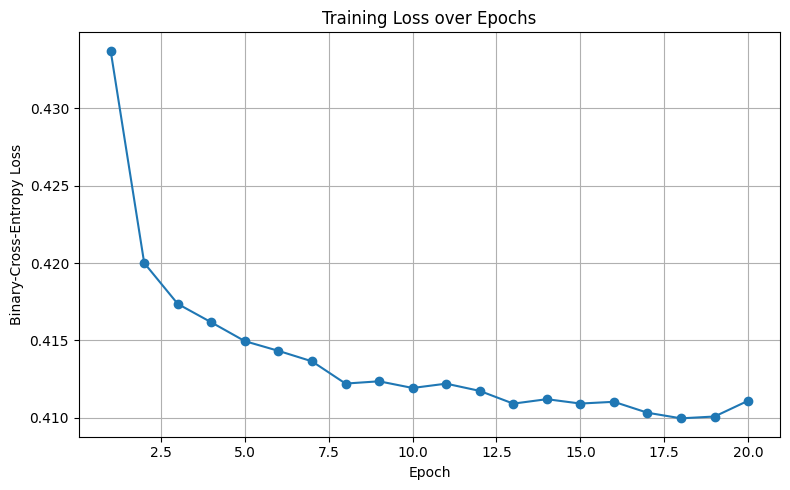

In [ ]:
#Plot training loss curve
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs1 + 1), train_losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary-Cross-Entropy Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluation on test set
model1.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device1)
    Y_test_tensor = Y_test_tensor.to(device1)

    test_outputs1 = model1(X_test_tensor)

    # Decision boundary 0.4
    test_preds1 = (test_outputs1 >= 0.4).float()
    test_accuracy1 = (test_preds1 == Y_test_tensor).float().mean().item()

print(f"\nTest Accuracy: {test_accuracy1:.4f}")


Test Accuracy: 0.8197


In [ ]:
#confision matrix
y_true1 = Y_test_tensor.numpy()
cm1 = confusion_matrix(y_true1, test_preds1)
cm1

array([[37667,  6000],
       [ 3150,  3919]])

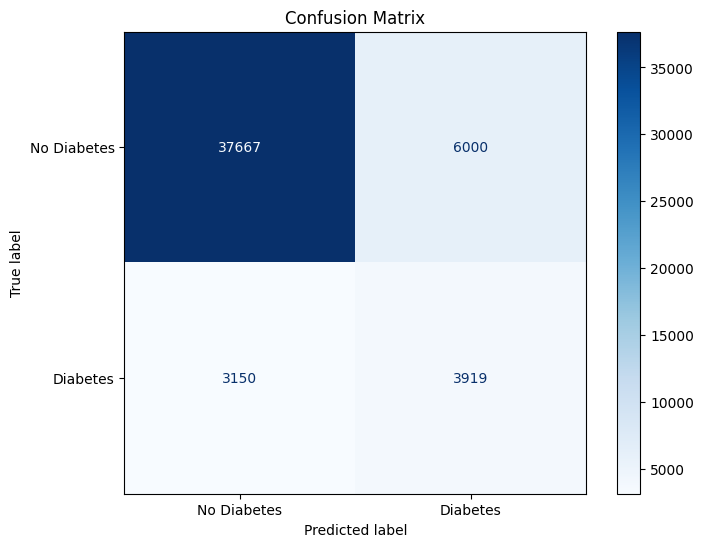

In [ ]:
class_names = ['No Diabetes', 'Diabetes']
plot_confusion_matrix(cm1, display_labels=class_names)

In [ ]:
TP1 = cm1[1,1]
TN1 = cm1[0,0]
FN1 = cm1[1,0]
FP1 = cm1[0,1]
Precision1 = TP1/(TP1 +FP1)
Recall1 = TP1/(TP1+FN1)
print(Precision1)
print(Recall1)

0.3951003125315052
0.554392417597963


Same architecture as the last model, two hidden layers × 64 with batch normalization, ReLU, and dropout (p=0.3), sigmoid output. trained on a different dataset (undersampled 70:30 to reduce class imbalance). No changes to layers or hyperparameters.

#Model 2

In [ ]:
class DiabetesClassifier2(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

In [ ]:
InputDim2 = X_train_tensor_bal.shape[1]
model2 = DiabetesClassifier2(InputDim2)
criterion2 = nn.BCELoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)

In [ ]:
epochs2 = 20
batch_size2 = 64
device2 = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = model2.to(device2)

In [ ]:
train_dataset2 = torch.utils.data.TensorDataset(X_train_tensor_bal, Y_train_tensor_bal)
train_loader2  = torch.utils.data.DataLoader(train_dataset2, batch_size=batch_size2, shuffle=True)

In [ ]:
train_losses2 = []
for ep in range(epochs2):
    model2.train()
    epoch_loss = 0.0
    correct, total = 0, 0

    for Xb, yb in train_loader2:
        Xb = Xb.to(device2)
        yb = yb.to(device2)

        optimizer2.zero_grad()
        out = model2(Xb)
        loss = criterion2(out, yb)
        loss.backward()
        optimizer2.step()

        epoch_loss += loss.item() * Xb.size(0)

        preds = (out >= 0.5).float()
        correct += (preds == yb).sum().item()
        total   += yb.size(0)

    epoch_loss /= len(train_loader2.dataset)
    acc = correct / total
    train_losses2.append(epoch_loss)
    print(f"Epoch {ep+1:02d}/{epochs2} | loss={epoch_loss:.4f} | acc={acc:.4f}")


Epoch 01/20 | loss=0.4275 | acc=0.7921
Epoch 02/20 | loss=0.4129 | acc=0.8017
Epoch 03/20 | loss=0.4101 | acc=0.8028
Epoch 04/20 | loss=0.4088 | acc=0.8038
Epoch 05/20 | loss=0.4076 | acc=0.8051
Epoch 06/20 | loss=0.4071 | acc=0.8045
Epoch 07/20 | loss=0.4057 | acc=0.8063
Epoch 08/20 | loss=0.4051 | acc=0.8060
Epoch 09/20 | loss=0.4048 | acc=0.8063
Epoch 10/20 | loss=0.4038 | acc=0.8077
Epoch 11/20 | loss=0.4034 | acc=0.8071
Epoch 12/20 | loss=0.4029 | acc=0.8071
Epoch 13/20 | loss=0.4020 | acc=0.8075
Epoch 14/20 | loss=0.4015 | acc=0.8088
Epoch 15/20 | loss=0.4014 | acc=0.8082
Epoch 16/20 | loss=0.4006 | acc=0.8096
Epoch 17/20 | loss=0.4003 | acc=0.8091
Epoch 18/20 | loss=0.3997 | acc=0.8098
Epoch 19/20 | loss=0.3994 | acc=0.8089
Epoch 20/20 | loss=0.3987 | acc=0.8097


In [ ]:
model2.eval()
with torch.no_grad():
    Xtt = X_test_tensor.to(device2)
    Ytt = Y_test_tensor.to(device2)
    prob2 = model2(Xtt)

thr2 = 0.4
pred2 = (prob2 >= thr2).float()
test_acc2 = (pred2 == Ytt).float().mean().item()
print(f"\n[Model 2] Test Accuracy @thr={thr2}: {test_acc2:.4f}")


[Model 2] Test Accuracy @thr=0.4: 0.8104


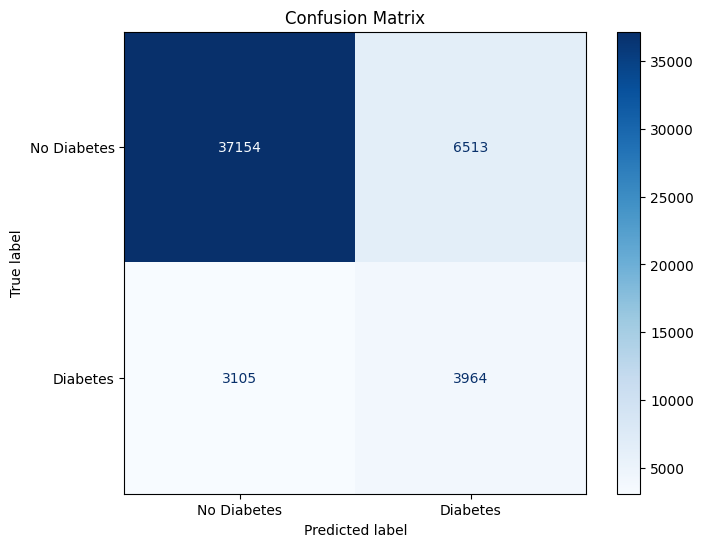

In [ ]:
cm2 = confusion_matrix(Ytt.cpu().numpy(), pred2.cpu().numpy())
class_names = ['No Diabetes', 'Diabetes']
plot_confusion_matrix(cm2, display_labels=class_names)

In [ ]:
TP2 = cm2[1,1]; TN2 = cm2[0,0]; FN2 = cm2[1,0]; FP2 = cm2[0,1]
Precision2 = TP2 / (TP2 + FP2 + 1e-12)
Recall2    = TP2 / (TP2 + FN2 + 1e-12)
print("Precision2:", Precision2)
print("Recall2:",    Recall2)

Precision2: 0.3783525818459482
Recall2: 0.5607582402037062


Same simple neural network as before: two hidden layers × 64 with batch normalization and ReLU, single sigmoid output, but without dropout. All other settings (BCE + Adam at lr=0.001, 20 epochs, batch size 64) remain the same.

#Model 3

In [ ]:
import torch, torch.nn as nn
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from itertools import product
import numpy as np

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
threshold = 0.4

In [ ]:
class Generic_Model(nn.Module):
    def __init__(self, input_dim, hidden=(96,64), p=0.3, use_bn=True):
        super().__init__()
        layers = []
        in_dim = input_dim
        for h in hidden:
            layers += [nn.Linear(in_dim, h)]
            if use_bn: layers += [nn.BatchNorm1d(h)]
            layers += [nn.ReLU(), nn.Dropout(p)]
            in_dim = h
        layers += [nn.Linear(in_dim, 1), nn.Sigmoid()]
        self.net = nn.Sequential(*layers)
    def forward(self, x): return self.net(x)


In [ ]:
def make_optimizer(params, name, lr=1e-3):
    return torch.optim.Adam(params, lr=lr) if name=="adam" else torch.optim.SGD(params, lr=lr, momentum=0.9, nesterov=True)

def make_loss(name):
    return nn.BCELoss() if name=="bce" else nn.MSELoss()

In [ ]:
#8-run mini experiment
def train_eval(loss_name, opt_name, batch_size, epochs=15):
    model = Generic_Model(X_train_tensor_bal.shape[1]).to(device)
    opt   = make_optimizer(model.parameters(), opt_name, lr=1e-3)
    crit  = make_loss(loss_name)

    train_ds  = torch.utils.data.TensorDataset(X_train_tensor_bal, Y_train_tensor_bal)
    train_dl  = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    model.train()
    for _ in range(epochs):
        for xb, yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            opt.zero_grad()
            out = model(xb)
            loss = crit(out, yb)
            loss.backward()
            opt.step()

    model.eval()
    with torch.no_grad():
        prob = model(X_test_tensor.to(device)).cpu().numpy().ravel()
        pred = (prob >= threshold).astype(int)
        yt   = Y_test_tensor.cpu().numpy().ravel()
        cm   = confusion_matrix(yt, pred)
        TP, TN, FN, FP = cm[1,1], cm[0,0], cm[1,0], cm[0,1]
        prec = TP/(TP+FP+1e-12); rec = TP/(TP+FN+1e-12)
        acc  = (TP+TN)/cm.sum(); f1 = f1_score(yt, pred)
    return {"loss":loss_name, "opt":opt_name, "bs":batch_size,-
            "acc":acc, "precision":prec, "recall":rec, "f1":f1, "cm":cm}

results = []
for loss_name, opt_name, bs in product(["bce","mse"], ["adam","sgd"], [32, 64]):
    metrics = train_eval(loss_name, opt_name, bs)
    results.append(metrics)
    print(f"{loss_name.upper()} | {opt_name.upper()} | bs={bs}  "
          f"-> Acc={metrics['acc']:.3f} P={metrics['precision']:.3f} "
          f"R={metrics['recall']:.3f} F1={metrics['f1']:.3f}")

BCE | ADAM | bs=32  -> Acc=0.808 P=0.380 R=0.600 F1=0.466
BCE | ADAM | bs=64  -> Acc=0.826 P=0.406 R=0.534 F1=0.461
BCE | SGD | bs=32  -> Acc=0.810 P=0.382 R=0.583 F1=0.461
BCE | SGD | bs=64  -> Acc=0.807 P=0.377 R=0.587 F1=0.459
MSE | ADAM | bs=32  -> Acc=0.815 P=0.388 R=0.564 F1=0.460
MSE | ADAM | bs=64  -> Acc=0.824 P=0.403 R=0.548 F1=0.465
MSE | SGD | bs=32  -> Acc=0.800 P=0.365 R=0.590 F1=0.451
MSE | SGD | bs=64  -> Acc=0.794 P=0.358 R=0.601 F1=0.449


A simple neural network with two hidden layers [96, 64], each hidden layer uses batch normalization (enabled), ReLU, and dropout (p=0.3), sigmoid output. We trained eight variants on the same 70:30 undersampled training set, combining loss {BCE, MSE} × optimizer {Adam, SGD} × batch size {32, 64}, for 15 epochs each. Evaluation used a 0.4 threshold to compute accuracy, precision, recall, F1, and a confusion matrix.

#Model 4

In [ ]:
class Chosen_Model(nn.Module):
    def __init__(self, input_dim, hidden=(96, 64), p_drop=0.3, use_bn=True):
        super().__init__()
        layers, in_dim = [], input_dim
        for h in hidden:
            layers += [nn.Linear(in_dim, h)]
            if use_bn: layers += [nn.BatchNorm1d(h)]
            layers += [nn.ReLU(), nn.Dropout(p_drop)]
            in_dim = h
        layers += [nn.Linear(in_dim, 1), nn.Sigmoid()]
        self.net = nn.Sequential(*layers)
    def forward(self, x): return self.net(x)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train_tensor_bal.shape[1]
model_prod = Chosen_Model(input_dim, hidden=(96,64), p_drop=0.3, use_bn=True).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_prod.parameters(), lr=1e-3)

In [ ]:
# Parameters
batch_size = 32
epochs = 30
train_ds = torch.utils.data.TensorDataset(X_train_tensor_bal, Y_train_tensor_bal)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [ ]:
# Final Production Model: BCE + Adam + bs=32
for ep in range(1, epochs+1):
    model_prod.train()
    running = 0.0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model_prod(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        running += loss.item() * xb.size(0)
    print(f"Epoch {ep:02d}/{epochs} | train loss={(running/len(train_dl.dataset)):.4f}")

Epoch 01/30 | train loss=0.4318
Epoch 02/30 | train loss=0.4208
Epoch 03/30 | train loss=0.4193
Epoch 04/30 | train loss=0.4171
Epoch 05/30 | train loss=0.4164
Epoch 06/30 | train loss=0.4153
Epoch 07/30 | train loss=0.4156
Epoch 08/30 | train loss=0.4152
Epoch 09/30 | train loss=0.4142
Epoch 10/30 | train loss=0.4143
Epoch 11/30 | train loss=0.4136
Epoch 12/30 | train loss=0.4133
Epoch 13/30 | train loss=0.4134
Epoch 14/30 | train loss=0.4129
Epoch 15/30 | train loss=0.4128
Epoch 16/30 | train loss=0.4124
Epoch 17/30 | train loss=0.4122
Epoch 18/30 | train loss=0.4127
Epoch 19/30 | train loss=0.4128
Epoch 20/30 | train loss=0.4122
Epoch 21/30 | train loss=0.4120
Epoch 22/30 | train loss=0.4106
Epoch 23/30 | train loss=0.4122
Epoch 24/30 | train loss=0.4109
Epoch 25/30 | train loss=0.4119
Epoch 26/30 | train loss=0.4109
Epoch 27/30 | train loss=0.4114
Epoch 28/30 | train loss=0.4112
Epoch 29/30 | train loss=0.4116
Epoch 30/30 | train loss=0.4112



Confusion matrix:
 [[34730  8937]
 [ 2283  4786]]
              precision    recall  f1-score   support

         0.0      0.938     0.795     0.861     43667
         1.0      0.349     0.677     0.460      7069

    accuracy                          0.779     50736
   macro avg      0.644     0.736     0.661     50736
weighted avg      0.856     0.779     0.805     50736



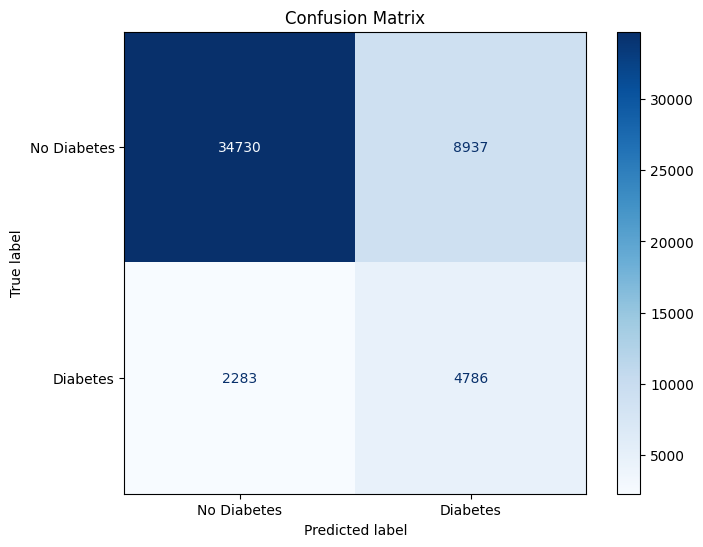

In [ ]:
model_prod.eval()
with torch.no_grad():
    prob = model_prod(X_test_tensor.to(device)).cpu().numpy().ravel()
    y_true = Y_test_tensor.cpu().numpy().ravel()

threshold = 0.35
y_pred = (prob >= threshold).astype(int)

cm = confusion_matrix(y_true, y_pred)
print("\nConfusion matrix:\n", cm)
print(classification_report(y_true, y_pred, digits=3))
plot_confusion_matrix(cm, display_labels=['No Diabetes', 'Diabetes'])

A simple neural network with two hidden layers [96, 64], each hidden layer uses batch normalization, ReLU, and dropout (p=0.3), sigmoid output. Trained with BCE loss and Adam (lr=0.001) for 30 epochs with batch size 32 on the 70:30 undersampled training set. Evaluated on the test set with a 0.35 threshold, reported accuracy, precision, recall, F1, and a confusion matrix.

#New Undersampling - (50:50 Strategy)



In [ ]:
rus50 = RandomUnderSampler(random_state=42)
X_train_bal50, Y_train_bal50 = rus50.fit_resample(X_train, Y_train)

print("\nAfter undersampling (train):")
print(Y_train_bal50.value_counts())
print(Y_train_bal50.value_counts(normalize=True))


After undersampling (train):
Diabetes_binary
0    28277
1    28277
Name: count, dtype: int64
Diabetes_binary
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
X_train_tensor50 = torch.tensor(X_train_bal50.values, dtype = torch.float32)
Y_train_tensor50 = torch.tensor(Y_train_bal50.values, dtype = torch.float32).unsqueeze(1) ##.unsqueeze(1) - change shape from (N) to (N,1)

In [ ]:
#check shapes
print(X_train_tensor50.shape)
print(Y_train_tensor50.shape)

torch.Size([56554, 40])
torch.Size([56554, 1])


#Model 5

In [ ]:
class Chosen_Model50(nn.Module):
    def __init__(self, input_dim2, hidden2=(96, 64), p_drop2=0.3, use_bn2=True):
        super().__init__()
        layers2, in2 = [], input_dim2
        for h2 in hidden2:
            layers2 += [nn.Linear(in2, h2)]
            if use_bn2: layers2 += [nn.BatchNorm1d(h2)]
            layers2 += [nn.ReLU(), nn.Dropout(p_drop2)]
            in2 = h2
        layers2 += [nn.Linear(in2, 1), nn.Sigmoid()]
        self.net2 = nn.Sequential(*layers2)
    def forward(self, x2):
        return self.net2(x2)

In [ ]:
device_50 = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim_50 = X_train_tensor50.shape[1]
model_prod2 = Chosen_Model50(input_dim_50, hidden2=(96,64), p_drop2=0.3, use_bn2=True).to(device_50)
criterion2 = nn.BCELoss()
optimizer2 = torch.optim.Adam(model_prod2.parameters(), lr=1e-3)

In [ ]:
batch_size_50 = 32
epochs_50 = 30

train_ds_50 = torch.utils.data.TensorDataset(X_train_tensor50, Y_train_tensor50)
train_dl_50 = torch.utils.data.DataLoader(train_ds_50, batch_size=batch_size_50, shuffle=True)

In [ ]:
for ep2 in range(1, epochs_50 + 1):
    model_prod2.train()
    run_loss2 = 0.0
    for xb2, yb2 in train_dl_50:
        xb2, yb2 = xb2.to(device_50), yb2.to(device_50)
        optimizer2.zero_grad()
        out2 = model_prod2(xb2)
        loss2 = criterion2(out2, yb2)
        loss2.backward()
        optimizer2.step()
        run_loss2 += loss2.item() * xb2.size(0)
    print(f"Epoch {ep2:02d}/{epochs_50} | train loss={(run_loss2/len(train_dl_50.dataset)):.4f}")

Epoch 01/30 | train loss=0.5400
Epoch 02/30 | train loss=0.5245
Epoch 03/30 | train loss=0.5227
Epoch 04/30 | train loss=0.5202
Epoch 05/30 | train loss=0.5190
Epoch 06/30 | train loss=0.5198
Epoch 07/30 | train loss=0.5165
Epoch 08/30 | train loss=0.5150
Epoch 09/30 | train loss=0.5164
Epoch 10/30 | train loss=0.5149
Epoch 11/30 | train loss=0.5145
Epoch 12/30 | train loss=0.5144
Epoch 13/30 | train loss=0.5148
Epoch 14/30 | train loss=0.5134
Epoch 15/30 | train loss=0.5134
Epoch 16/30 | train loss=0.5134
Epoch 17/30 | train loss=0.5138
Epoch 18/30 | train loss=0.5135
Epoch 19/30 | train loss=0.5119
Epoch 20/30 | train loss=0.5119
Epoch 21/30 | train loss=0.5109
Epoch 22/30 | train loss=0.5116
Epoch 23/30 | train loss=0.5101
Epoch 24/30 | train loss=0.5112
Epoch 25/30 | train loss=0.5101
Epoch 26/30 | train loss=0.5105
Epoch 27/30 | train loss=0.5107
Epoch 28/30 | train loss=0.5104
Epoch 29/30 | train loss=0.5086
Epoch 30/30 | train loss=0.5092



Confusion matrix (v2):
 [[30077 13590]
 [ 1369  5700]]
              precision    recall  f1-score   support

         0.0      0.956     0.689     0.801     43667
         1.0      0.295     0.806     0.432      7069

    accuracy                          0.705     50736
   macro avg      0.626     0.748     0.617     50736
weighted avg      0.864     0.705     0.750     50736



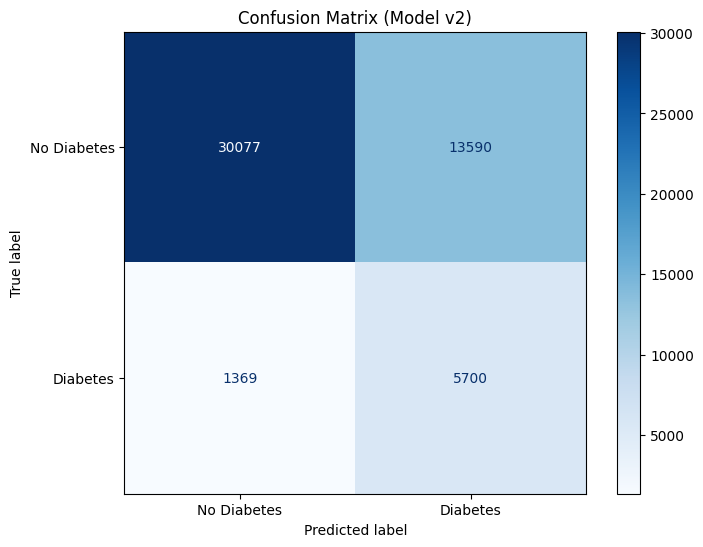

In [ ]:
model_prod2.eval()
with torch.no_grad():
    probs2  = model_prod2(X_test_tensor.to(device_50)).cpu().numpy().ravel()
    y_true2 = Y_test_tensor.cpu().numpy().ravel()

threshold2 = 0.5
y_pred2 = (probs2 >= threshold2).astype(int)

cm2 = confusion_matrix(y_true2, y_pred2)
print("\nConfusion matrix (v2):\n", cm2)
print(classification_report(y_true2, y_pred2, digits=3))

plot_confusion_matrix(cm2, display_labels=['No Diabetes', 'Diabetes'], title='Confusion Matrix (Model v2)')

Same architecture and hyperparameters as the Chosen_Model, trained on a 50:50 undersampled training set

#New Undersamplin - (60:40 Strategy)

In [ ]:
rus60 = RandomUnderSampler(sampling_strategy=0.65,random_state=42)
X_train_bal60, Y_train_bal60 = rus60.fit_resample(X_train, Y_train)

print("\nAfter undersampling (train):")
print(Y_train_bal60.value_counts())
print(Y_train_bal60.value_counts(normalize=True))


After undersampling (train):
Diabetes_binary
0    43503
1    28277
Name: count, dtype: int64
Diabetes_binary
0    0.60606
1    0.39394
Name: proportion, dtype: float64


In [ ]:
X_train_tensor60 = torch.tensor(X_train_bal60.values, dtype = torch.float32)
Y_train_tensor60 = torch.tensor(Y_train_bal60.values, dtype = torch.float32).unsqueeze(1) ##.unsqueeze(1) - change shape from (N) to (N,1)

In [ ]:
#check shapes
print(X_train_tensor60.shape)
print(Y_train_tensor60.shape)

torch.Size([71780, 40])
torch.Size([71780, 1])


# Model 6

In [ ]:
class Chosen_Model60(nn.Module):
    def __init__(self, input_dim_60, hidden_60=(96, 64), p_drop_60=0.3, use_bn_60=True):
        super().__init__()
        layers_60, in_dim_60 = [], input_dim_60
        for h_60 in hidden_60:
            layers_60 += [nn.Linear(in_dim_60, h_60)]
            if use_bn_60: layers_60 += [nn.BatchNorm1d(h_60)]
            layers_60 += [nn.ReLU(), nn.Dropout(p_drop_60)]
            in_dim_60 = h_60
        layers_60 += [nn.Linear(in_dim_60, 1), nn.Sigmoid()]
        self.net_60 = nn.Sequential(*layers_60)
    def forward(self, x_60):
        return self.net_60(x_60)

In [ ]:
# Device / init
device_60 = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim_60 = X_train_tensor60.shape[1]
model_prod60 = Chosen_Model60(input_dim_60, hidden_60=(96,64), p_drop_60=0.3, use_bn_60=True).to(device_60)

# Loss & optimizer
criterion60 = nn.BCELoss()
optimizer60 = torch.optim.Adam(model_prod60.parameters(), lr=1e-3)

In [ ]:
batch_size_60 = 32
epochs_60 = 30

train_ds_60 = torch.utils.data.TensorDataset(X_train_tensor60, Y_train_tensor60)
train_dl_60 = torch.utils.data.DataLoader(train_ds_60, batch_size=batch_size_60, shuffle=True)

In [ ]:
for ep_60 in range(1, epochs_60 + 1):
    model_prod60.train()
    running_60 = 0.0
    for xb_60, yb_60 in train_dl_60:
        xb_60, yb_60 = xb_60.to(device_60), yb_60.to(device_60)
        optimizer60.zero_grad()
        out_60 = model_prod60(xb_60)
        loss_60 = criterion60(out_60, yb_60)
        loss_60.backward()
        optimizer60.step()
        running_60 += loss_60.item() * xb_60.size(0)
    print(f"Epoch {ep_60:02d}/{epochs_60} | train loss={(running_60/len(train_dl_60.dataset)):.4f}")

Epoch 01/30 | train loss=0.5230
Epoch 02/30 | train loss=0.5097
Epoch 03/30 | train loss=0.5071
Epoch 04/30 | train loss=0.5062
Epoch 05/30 | train loss=0.5049
Epoch 06/30 | train loss=0.5047
Epoch 07/30 | train loss=0.5029
Epoch 08/30 | train loss=0.5029
Epoch 09/30 | train loss=0.5015
Epoch 10/30 | train loss=0.5011
Epoch 11/30 | train loss=0.5009
Epoch 12/30 | train loss=0.5009
Epoch 13/30 | train loss=0.4995
Epoch 14/30 | train loss=0.4984
Epoch 15/30 | train loss=0.4985
Epoch 16/30 | train loss=0.4996
Epoch 17/30 | train loss=0.4986
Epoch 18/30 | train loss=0.4993
Epoch 19/30 | train loss=0.4982
Epoch 20/30 | train loss=0.4976
Epoch 21/30 | train loss=0.4981
Epoch 22/30 | train loss=0.4976
Epoch 23/30 | train loss=0.4977
Epoch 24/30 | train loss=0.4982
Epoch 25/30 | train loss=0.4961
Epoch 26/30 | train loss=0.4981
Epoch 27/30 | train loss=0.4965
Epoch 28/30 | train loss=0.4967
Epoch 29/30 | train loss=0.4968
Epoch 30/30 | train loss=0.4962



Confusion matrix (v60):
 [[27279 16388]
 [  939  6130]]
              precision    recall  f1-score   support

         0.0      0.967     0.625     0.759     43667
         1.0      0.272     0.867     0.414      7069

    accuracy                          0.658     50736
   macro avg      0.619     0.746     0.587     50736
weighted avg      0.870     0.658     0.711     50736

Accuracy (v60): 0.658


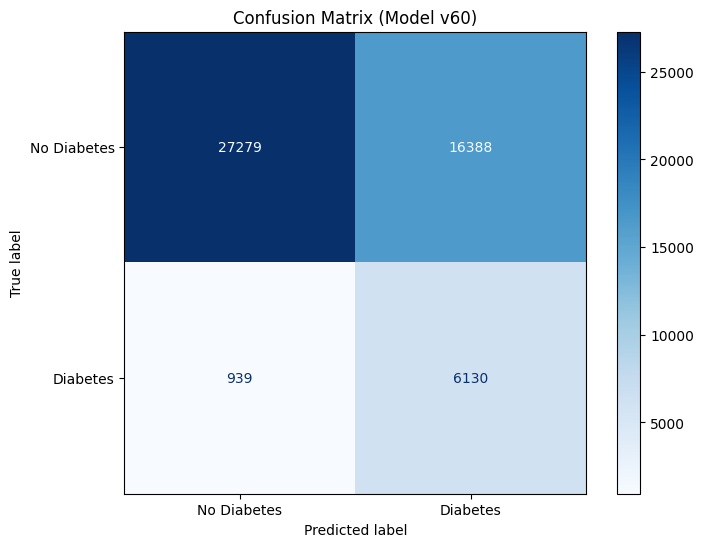

In [ ]:
model_prod60.eval()
with torch.no_grad():
    probs_60  = model_prod60(X_test_tensor.to(device_60)).cpu().numpy().ravel()
    y_true_60 = Y_test_tensor.cpu().numpy().ravel()

threshold_60 = 0.35
y_pred_60 = (probs_60 >= threshold_60).astype(int)

cm_60 = confusion_matrix(y_true_60, y_pred_60)
print("\nConfusion matrix (v60):\n", cm_60)
print(classification_report(y_true_60, y_pred_60, digits=3))
print(f"Accuracy (v60): {(cm_60[0,0] + cm_60[1,1]) / cm_60.sum():.3f}")

plot_confusion_matrix(cm_60, display_labels=['No Diabetes', 'Diabetes'], title='Confusion Matrix (Model v60)')

#### Same model different threshold


Confusion matrix (v60):
 [[33595 10072]
 [ 2019  5050]]
              precision    recall  f1-score   support

         0.0      0.943     0.769     0.847     43667
         1.0      0.334     0.714     0.455      7069

    accuracy                          0.762     50736
   macro avg      0.639     0.742     0.651     50736
weighted avg      0.858     0.762     0.793     50736

Accuracy (v60): 0.762


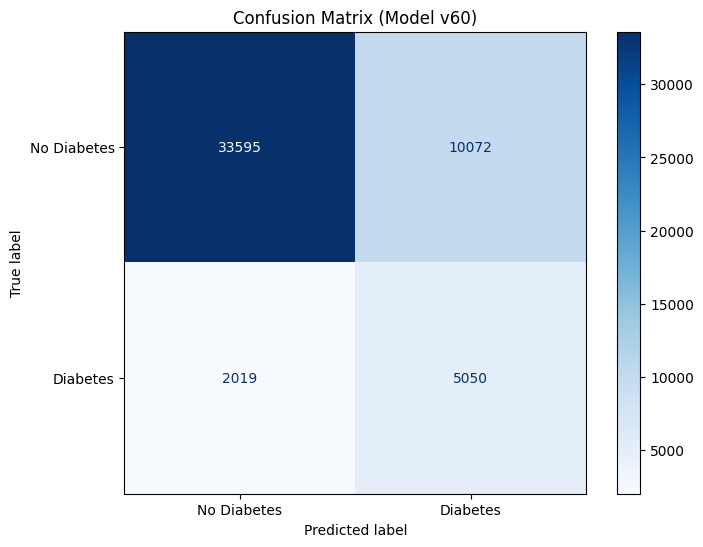

In [ ]:
model_prod60.eval()
with torch.no_grad():
    probs_60  = model_prod60(X_test_tensor.to(device_60)).cpu().numpy().ravel()
    y_true_60 = Y_test_tensor.cpu().numpy().ravel()

threshold_60 = 0.5
y_pred_60 = (probs_60 >= threshold_60).astype(int)

cm_60 = confusion_matrix(y_true_60, y_pred_60)
print("\nConfusion matrix (v60):\n", cm_60)
print(classification_report(y_true_60, y_pred_60, digits=3))
print(f"Accuracy (v60): {(cm_60[0,0] + cm_60[1,1]) / cm_60.sum():.3f}")

plot_confusion_matrix(cm_60, display_labels=['No Diabetes', 'Diabetes'], title='Confusion Matrix (Model v60)')

Same architecture and hyperparameters as the Chosen_Model, trained on a 60:40 undersampled training set. Evaluated at two thresholds (0.35 and 0.5) to compare the precision–recall trade-off. reported accuracy, precision, recall, F1, and confusion matrices.

#Economic Model

In [ ]:
params = {
    "C_screen":   1.0,      # cost to score each person
    "C_confirm":  30.0,    # confirmatory test for predicted positives
    "C_treat":    200.0,    # early-treatment onboarding cost (TP)
    "B_TP":       6000.0,  # avoided downstream cost per TP
    "C_FN":       12000.0,  # downstream cost per missed diabetic (FN)
    "C_FP_extra": 20.0      # extra burden per FP beyond confirm test
}
SCALE  = 1e6
YLABEL = "Millions [$]"
DEC    = 1

In [ ]:
def counts_from_sklearn_cm(cm_2x2):
    tn, fp, fn, tp = int(cm_2x2[0,0]), int(cm_2x2[0,1]), int(cm_2x2[1,0]), int(cm_2x2[1,1])
    return tn, fp, fn, tp

In [ ]:
def evaluate_counts(TN, FP, FN, TP, params, name="Model"):
    N = TN + FP + FN + TP
    screening_cost = N  * params["C_screen"]
    confirm_cost   = (TP + FP) * params["C_confirm"]
    treat_cost     = TP * params["C_treat"]
    fp_extra_cost  = FP * params["C_FP_extra"]
    missed_cost    = FN * params["C_FN"]
    total_costs    = screening_cost + confirm_cost + treat_cost + fp_extra_cost + missed_cost
    total_benefits = TP * params["B_TP"]
    net_total      = total_benefits - total_costs
    net_per_person = net_total / N
    return {
        "Model": name, "N": N,
        "TP": TP, "FP": FP, "TN": TN, "FN": FN,
        "Cost: screening": screening_cost,
        "Cost: confirm": confirm_cost,
        "Cost: treat (TP)": treat_cost,
        "Cost: FP extra": fp_extra_cost,
        "Cost: missed (FN)": missed_cost,
        "Total Costs": total_costs,
        "Total Benefits": total_benefits,
        "Net Value (total)": net_total,
        "Net Value (per person)": net_per_person
    }

In [ ]:
def evaluate_from_sklearn_cm(cm, params, name="Model"):
    TN, FP, FN, TP = counts_from_sklearn_cm(cm)
    return evaluate_counts(TN, FP, FN, TP, params, name=name)

In [ ]:
def plot_cost_components(res):
    labels = ["Cost: screening","Cost: confirm","Cost: treat (TP)","Cost: FP extra","Cost: missed (FN)"]
    values = [res[k] for k in labels]
    vals   = [v / SCALE for v in values]

    plt.figure()
    bars = plt.bar(labels, vals)
    plt.title(f"Cost Components — {res['Model']}")
    plt.ylabel(YLABEL)
    plt.xticks(rotation=15)
    plt.gca().yaxis.grid(True, linestyle="--", alpha=0.4)
    for i, b in enumerate(bars):
        plt.text(b.get_x()+b.get_width()/2, b.get_height(),
                 f"{vals[i]:.{DEC}f}", ha="center", va="bottom", fontsize=9)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_net(res):
    labels = ["Total Costs","Total Benefits","Net Value (total)"]
    values = [res["Total Costs"], res["Total Benefits"], res["Net Value (total)"]]
    vals   = [v / SCALE for v in values]

    plt.figure()
    bars = plt.bar(labels, vals)
    plt.title(f"Costs vs Benefits vs Net — {res['Model']}")
    plt.ylabel(YLABEL)
    plt.xticks(rotation=10)
    plt.gca().yaxis.grid(True, linestyle="--", alpha=0.4)
    for i, b in enumerate(bars):
        plt.text(b.get_x()+b.get_width()/2, b.get_height(),
                 f"{vals[i]:.{DEC}f}", ha="center", va="bottom", fontsize=9)
    plt.tight_layout()
    plt.show()


In [ ]:
res_final = evaluate_from_sklearn_cm(cm,params, name="Model 4 (Chosen Model)")
res_u50 = evaluate_from_sklearn_cm(cm2,params, name="Model 5 (Chosen Model50)")
res_u60 = evaluate_from_sklearn_cm(cm_60,params, name="Model 6 (Chosen Model60)")

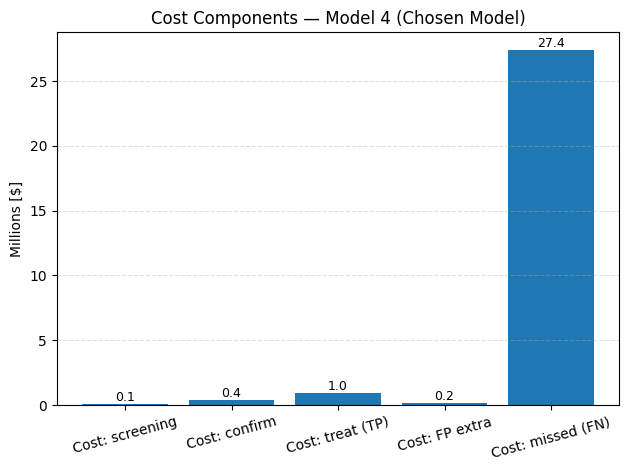

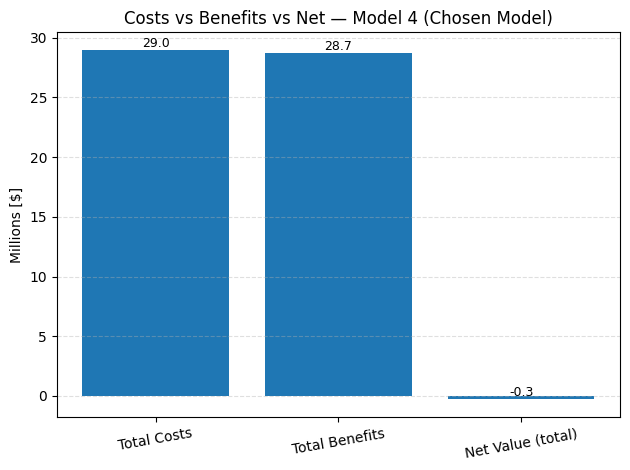

In [ ]:
plot_cost_components(res_final)
plot_net(res_final)

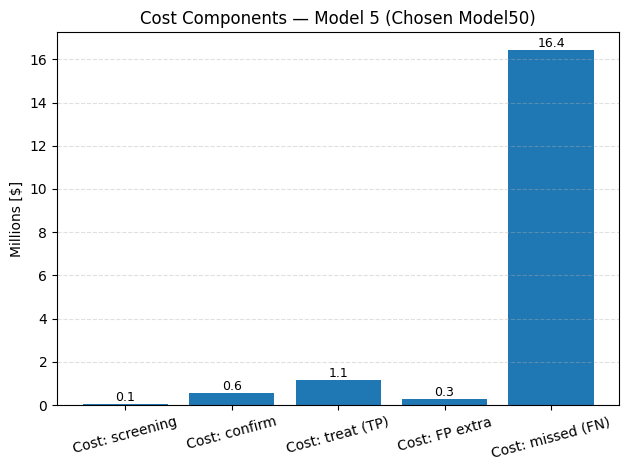

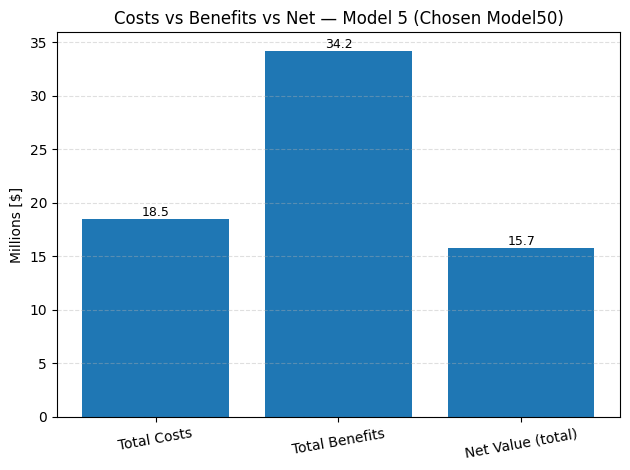

In [ ]:
plot_cost_components(res_u50)
plot_net(res_u50)

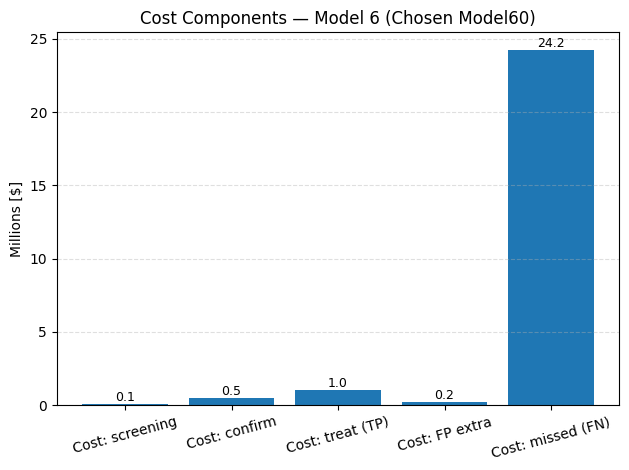

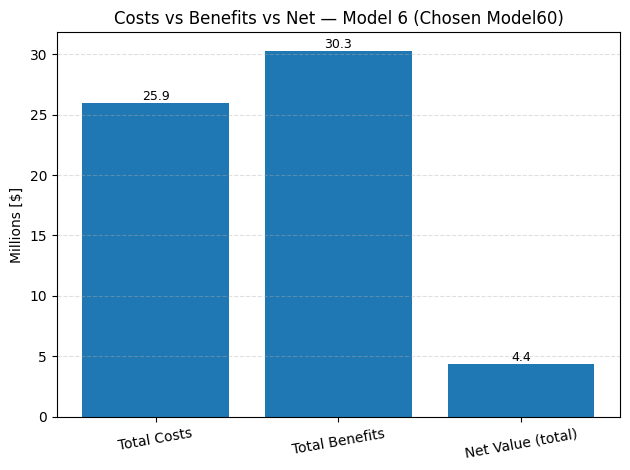

In [ ]:
plot_cost_components(res_u60)
plot_net(res_u60)

In [ ]:
df_compare = pd.DataFrame([res_final, res_u50, res_u60])
print(df_compare[["Model","N","TP","FP","TN","FN","Total Costs","Total Benefits","Net Value (total)","Net Value (per person)"]])

                      Model      N    TP     FP     TN    FN  Total Costs  \
0    Model 4 (Chosen Model)  50736  4786   8937  34730  2283   28994366.0   
1  Model 5 (Chosen Model50)  50736  5700  13590  30077  1369   18469236.0   
2  Model 6 (Chosen Model60)  50736  5050  10072  33595  2019   25943836.0   

   Total Benefits  Net Value (total)  Net Value (per person)  
0      28716000.0          -278366.0               -5.486558  
1      34200000.0         15730764.0              310.051325  
2      30300000.0          4356164.0               85.859429  


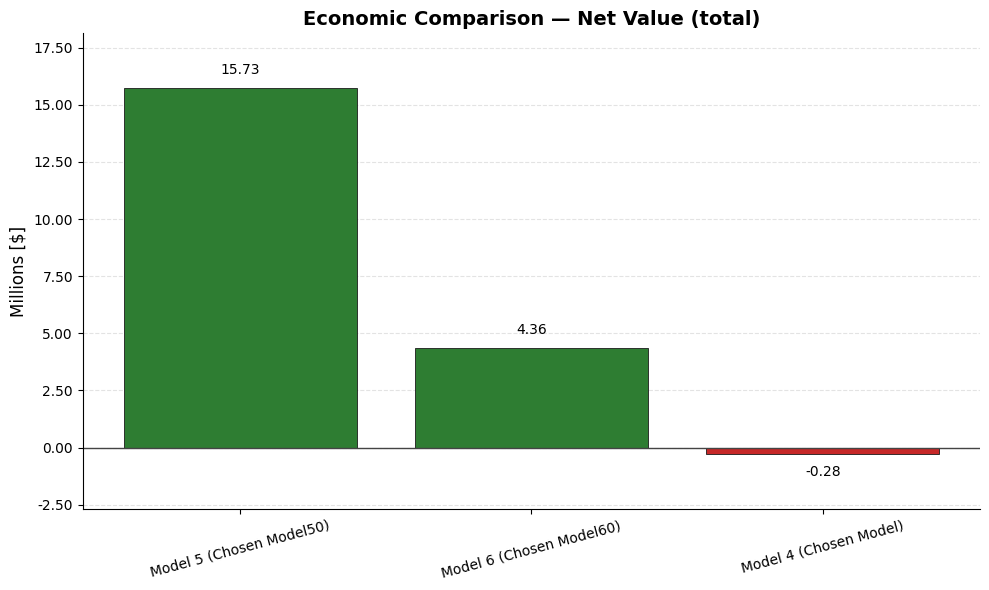

In [ ]:
from matplotlib.ticker import FuncFormatter

# Example: adjust for your actual variables
vals   = (df_compare["Net Value (total)"].to_numpy(dtype=float)) / SCALE
labels = df_compare["Model"].astype(str).tolist()

# Sort bars for readability (highest to lowest)
order  = np.argsort(-vals)
vals   = vals[order]
labels = [labels[i] for i in order]

# Colors by sign
colors = np.where(vals >= 0, "#2E7D32", "#C62828")  # green for +, red for -

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, vals, color=colors, edgecolor="#1b1b1b", linewidth=0.6)

# Title & axis labels
ax.set_title("Economic Comparison — Net Value (total)", fontsize=14, weight="bold")
ax.set_ylabel("Millions [$]", fontsize=12)

# Y-axis formatting with DEC precision (default: 2 if not set)
DEC = 2
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:,.{DEC}f}"))

# Style
ax.grid(True, axis="y", linestyle="--", alpha=0.35)
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation=15)

# Zero line
ax.axhline(0, color="#444444", linewidth=1)

# Value labels
offset = max(abs(vals)) * 0.03 if vals.size else 0.02
for b, v in zip(bars, vals):
    y = b.get_height()
    dy = offset if y >= 0 else -offset
    ax.text(
        b.get_x() + b.get_width()/2, y + dy,
        f"{v:,.{DEC}f}",
        ha="center", va=("bottom" if y >= 0 else "top"), fontsize=10
    )

ax.margins(y=0.15)
fig.tight_layout()
plt.show()
